# Imports

In [314]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

**Load Dataset**

In [315]:
# Load dataset into a dataframe
df = pd.read_csv('data/car_prices.csv')

# Display first few rows of the dataframe
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


**Data Dictionary** 

Variable  |Description |
-----|-----|
Vehicle Details |Includes specific information about each vehicle, such as its make, model, trim, and manufacturing year.|
Transaction Information | Provides insights into the sales transactions, including selling prices and sale dates.|
Market Trends | MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations.|
Condition and Mileage | Contains data on the condition of the vehicles as well as their odometer readings, enabling analysis of how these factors influence selling prices.|

# Data Discovery

**Gather basic information about the data**

In [316]:
# How large the dataset is. Total values across the whole data
print('Size:', df.size)

# Basic info
df.info()

Size: 8941392
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


- The dataset is large, containing almost 9 million entries (8.9 million to be exact).
- Each entry represents a unique car transaction.
- There are 16 features with information about the car and transaction:
    - 11 categorical variables (text data): make, model, trim, body, transmission, vin, state, color, interior, seller, saledate
    - 5 numerical variables: year, condition, odometer, mmr, sellingprice
- Most data has missing values (13 out of 16 variables).
    - Only year, state, and seller columns have consistent data.

**Statistics summary**

In [317]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


- The dataset covers car sales from 2014-2015 with a total of 558,837 cars sold in this period.
- The cars were manufactured between 1982 and 2015.
- Half of the cars were sold were manufactured after 2012, indicating a shift towards newer vehicles in recent years.
- Vehicle condition ranges from 1 to 49, with an average of around 30.
- Odometer readings vary widely, from 1 mile to nearly 1 million miles, with an average around 30,000 miles.
- The selling price closely matches the MMR, suggesting MMR is a reliable indicator of a car's worth.
- Car prices range dramatically, from a minimum of $1 to a maximum of $230,000, and an average around $13,600.

# Data Structuring & Cleaning

## saledate

The `saledate` column is a concatenation of various date values (weekday, month, year, etc.). 

**Let's separate them into new columns**

In [318]:
# filter by saledate column to review the data 
df['saledate'].head(2)

0    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
Name: saledate, dtype: object

In [319]:
# create new columns to store split data from saledate
df[['sale_weekday','sale_month','sale_day','sale_year','sale_time','GMT','PST']] = df['saledate'].str.split(' ',expand=True)
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_weekday,sale_month,sale_day,sale_year,sale_time,GMT,PST
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Tue,Dec,16,2014,12:30:00,GMT-0800,(PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Tue,Dec,16,2014,12:30:00,GMT-0800,(PST)


**Drop redundant columns**

In [320]:
# Create a copy of the original dataframe 
df_new = df.copy()

# Drop the redundant saledate column and other nonessential time columns.
df_new = df.drop(columns=['saledate','sale_time','GMT','PST'])

In [321]:
df_new.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,16,2014
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,16,2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,Jan,15,2015
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,Jan,29,2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,Dec,18,2014


**Next, check unique values for categorical variables**

## make 

In [322]:
# Count number of unique values 
num_unique_values = df_new['make'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df_new['make'].sort_values(ascending = True).unique()

Number of unique values: 96


array(['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT',
       'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda',
       'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI',
       'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi',
       'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram',
       'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki',
       'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'acura', 'airstream',
       'audi', 'bmw', 'buick', 'cadillac', 'chev truck', 'chevrolet',
       'chrysler', 'dodge', 'dodge tk', 'dot', 'ford', 'ford tk',
       'ford truck', 'gmc', 'gmc truck', 'honda', 'hyundai', 'hyundai tk',
       'jeep', 'kia', 'land rover', 'landrover', 'lexus', 'lincoln',
       'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b',
       'mercury', 'mitsubish

There are 96 unique values for car `make` but many are duplicates with different text cases or spelling

for example
- volkswagen vs. vw
- Suzuki vs. suzuki
- subaru vs. Subaru

**Replace duplicates by converting all the variations of each `make` to a common format**

In [323]:
# create a dictionary of replacements
make_replacements = {
                    'Volvo': 'volvo',
                    'vw': 'volkswagen',
                    'Jaguar': 'jaguar',
                    'Volkswagen': 'volkswagen',
                    'Suzuki':'suzuki', 
                    'Subaru': 'subaru', 
                    'Porsche': 'porsche',
                    'Pontiac': 'pontiac',
                    'Plymouth':'plymouth',
                    'Oldsmobile':'oldsmobile',
                    'Mitsubishi':'mitsubishi', 
                    'Mercury':'mercury',
                    'Maserati': 'maserati',
                    'Hyundai': 'hyundai',
                    'hyundai tk': 'hyundai',
                    'Honda':'honda',
                    'Ford':  'ford',
                    'Acura': 'acura',
                    'Audi':'audi',
                    'BMW': 'bmw',
                    'Buick': 'buick', 
                    'Lincoln': 'lincoln',
                    'Lexus': 'lexus',
                    'Toyota': 'toyota',
                    'GMC': 'gmc',
                    'gmc truck':'gmc',
                    'Mercedes-Benz': 'mercedes',
                    'mercedes-b': 'mercedes',
                    'Mazda':'mazda',
                    'mazda tk': 'mazda',
                    'landrover':  'land rover',
                    'Pontiac': 'pontiac',
                    'ford tk': 'ford', 
                    'ford truck': 'ford', 
                    'Chevrolet': 'chevrolet',
                    'chev truck': 'chevrolet',
                    'Cadillac': 'cadillac',
                    'Nissan':  'nissan', 
                    'Chrysler':'chrysler',
                    'Dodge':'dodge', 
                    'dodge tk':'dodge',
                    'Kia':'kia',
                    'Jeep': 'jeep',
                    'MINI':'mini',
                    'FIAT':'fiat',
                    'Ferrari': 'ferrari',
                    'Ram': 'ram',
                    'Bentley':'bentley',
                    'Saturn':'saturn',
                    'HUMMER': 'hummer',
                    'Saab':'saab',
                    'Rolls-Royce':'rolls royce',
                    'Daewoo':'daewoo',
                    'Isuzu': 'isuzu',
                    'Geo': 'geo',
                    'Tesla':'tesla',
                    'Aston Martin': 'aston martin',
                    'Fisker': 'fisker',
                    'Lamborghini':'lamborghini',
                    'Lotus':'lotus',
                    'Infiniti':'infiniti',
                    'Land Rover':'land rover',
                    'Scion':'scion',
                    'dot':'dodge'
                     }

# replace values using the .map() method
df_new['make'] = df_new['make'].map(make_replacements).fillna(df_new['make'])

# print the DataFrame
df_new['make'].sort_values(ascending=True).unique()

array(['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw',
       'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge',
       'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda',
       'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia',
       'lamborghini', 'land rover', 'lexus', 'lincoln', 'lotus',
       'maserati', 'mazda', 'mercedes', 'mercury', 'mini', 'mitsubishi',
       'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram',
       'rolls royce', 'saab', 'saturn', 'scion', 'smart', 'subaru',
       'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo', nan],
      dtype=object)

The duplicates have been replaced. 

**Let's check the count of unique values again**

In [324]:
num_unique_values = df_new['make'].nunique()
print(f'Number of unique values: {num_unique_values}')

Number of unique values: 54


After removing the duplicates, the actual unique value count for car `make` is reduced from 96 to 54.

## model

In [325]:
# Count number of unique values 
num_unique_values = df_new['model'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df_new['model'].sort_values(ascending = True).unique()

Number of unique values: 973


array(['1', '1 Series', '1500', '190-Class', '2 Series', '200', '200SX',
       '2500', '3', '3 Series', '3 Series Gran Turismo', '300',
       '300-Class', '3000GT', '300M', '300ZX', '300e', '320i', '323i',
       '328i', '350', '3500', '350Z', '350z', '360', '370Z', '4 Series',
       '4 Series Gran Coupe', '400-Class', '420-Class', '420sel', '42c',
       '458 Italia', '4Runner', '5 Series', '5 Series Gran Turismo',
       '500', '500-Class', '500L', '500e', '6', '6 Series',
       '6 Series Gran Coupe', '626', '7', '7 Series', '750i', '750li',
       '750lxi', '8 Series', '850', '9-2X', '9-3', '9-5', '9-7X', '911',
       '940', '960', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'ATS', 'Acadia',
       'Accent', 'Accord', 'Accord Crosstour', 'Accord Hybrid', 'Achieva',
       'ActiveHybrid 5', 'ActiveHybrid 7', 'ActiveHybrid X6', 'Aerio',
       'Alero', 'Altima', 'Altima Hybrid', 'Amanti', 'Amigo', 'Armada',
       'Ascender', 'Aspen', 'Aspire', 'Astra', 'Astro', 'Astro Cargo',
       'Au

There are 973 unique values for car `model` but many are duplicates with different text cases or spelling

for example
- Accord vs. accord
- Tundra vs. tundra 
- Yaris vs. yaris

**Replace duplicates by converting all the variations of each `model` to a common format**

In [326]:
# create a dictionary of replacements
model_replacements = { 
                     'A4':'a4',
                     'A6': 'a6',
                     'Accord': 'accord',
                     'Alero': 'alero',
                     'Astro': 'astro',
                     'Avalon': 'avalon',
                     'Avenger': 'avenger',
                     'Aveo': 'aveo',
                     'Beetle': 'beetle',
                     'Borrego': 'borrego',
                     'Breeze': 'breeze',
                     'CX-7': 'cx-7',
                     'Camaro': 'camaro',
                     'Camry': 'camry',
                     'Caravan': 'caravan',
                     'Cavalier': 'cavalier',
                     'Century': 'century',
                     'Charger': 'charger',
                     'Cherokee': 'cherokee',
                     'Civic': 'civic',
                     'Civic del Sol': 'cobalt',
                     'Classic': 'colorado',
                     'Commander': 'comm',
                     'Compass': 'compass',
                     'Concorde': 'concorde',
                     'Corolla': 'corolla',
                     'Corsica': 'corsica',
                     'Corvette': 'corvette',
                     'Cougar': 'cougar',
                     'Crossfire': 'crossfire',
                     'Crown Victoria': 'crown',
                     'Cruze': 'cruze',
                     'DTS': 'dts',
                     'Dakota': 'dakota',
                     'Discovery': 'discovery',
                     'Durango': 'durango',
                     'E-150': 'e150',
                     'E-250': 'e250',
                     'E-350': 'e350',
                     'Elantra': 'elantra',
                     'Endeavor': 'endeavor',
                     'Envoy': 'envoy',
                     'Equinox': 'equinox',
                     'Escalade': 'escalade',
                     'Escape': 'escape',
                     'EuroVan': 'eurovan',
                     'Excursion': 'excurs',
                     'Expedition': 'expedition',
                     'expedit': 'expedition',
                     'expeditn': 'expedition',
                     'Explorer': 'explorer',
                     'F-150': 'f150',
                     'F-250': 'f250',
                     'F-350 Super Duty': 'f350',
                     'Focus': 'focus',
                     'Forester': 'forester',
                     'Freestyle': 'freestyle',
                     'G5': 'g5',
                     'G6': 'g6',
                     'Galant': 'galant',
                     'Golf': 'golf',
                     'GranSport': 'grand',
                     'GranTurismo': 'gx',
                     'Impala': 'impala',
                     'Intrepid': 'intrepid',
                     'Intrigue': 'intrigue',
                     'Jetta': 'jetta',
                     'Journey': 'journey',
                     'LR3': 'lr3',
                     'LaCrosse': 'lacrosse',
                     'Lancer': 'lancer',
                     'Legacy': 'legacy',
                     'Legend': 'lumina',
                     'Magnum': 'magnum',
                     'Malibu': 'malibu',
                     'Matrix': 'matrix',
                     'Mazda3': 'mazda3',
                     'Mazda5': 'mazda5',
                     'Mazda6': 'mazda6',
                     'Montana': 'montana',
                     'Mountaineer': 'mountaineer',
                     'mountnr': 'mountaineer',
                     'Neon': 'neon',
                     'Odyssey': 'odyssey',
                     'Optima': 'optima',
                     'Pacifica': 'pacifica',
                     'Passat': 'passat',
                     'Pathfinder': 'pathfinder',
                     'pathfind': 'pathfinder',
                     'Patriot': 'patriot',
                     'Pickup': 'pickup',
                     'Pilot': 'pilot',
                     'Quattroporte': 'quattroporte',
                     'Quest': 'quest',
                     'RL': 'rl',
                     'RS 7': 'rr',
                     'RX-8': 'rx8',
                     'Rainier': 'rainier',
                     'Ram Cargo': 'ram',
                     'Ram Pickup 3500': 'ram3500',
                     'Range Rover': 'rangerover',
                     'range': 'rangerover',
                     'ranger': 'rangerover',
                     'Range Rover Sport': 'rrs',
                     'Regal': 'regal',
                     'Ridgeline': 'ridgelin',
                     'Rio': 'rio',
                     'Routan': 'routan',
                     'S-10': 's10',
                     'SRX': 'srx',
                     'STS': 'sts',
                     'SX4': 'sx4',
                     'Safari': 'safari',
                     'Santa Fe': 'santa',
                     'Savana': 'savana',
                     'Sebring': 'sebring',
                     'Sienna': 'sienna',
                     'Sierra 1500': 'siera',
                     'Silhouette': 'silhouette',
                     'Sonic': 'sonic',
                     'Sonoma': 'sonoma',
                     'Sportage': 'sportage',
                     'Sprinter': 'sprinter',
                     'Stratus': 'stratus',
                     'Suburban': 'suburban',
                     'subrbn': 'suburban',
                     'Tahoe': 'tahoe',
                     'Taurus': 'taurus',
                     'Thunderbird': 'thunderbird',
                     'Town Car': 'town',
                     'Town and Country': 'twn&country',
                     'twn/cntry': 'twn&country',
                     'Tribute': 'tribute',
                     'Tucson': 'tucson',
                     'Tundra': 'tundra',
                     'Uplander': 'uplander',
                     'uplandr': 'uplander',
                     'Venture': 'venture',
                     'Versa': 'versa',
                     'Vibe': 'vibe',
                     'Villager': 'villager',
                     'Voyager': 'voyager',
                     'Windstar': 'windstar',
                     'Wrangler': 'wrangler',
                     'X3': 'x3',
                     'Yaris': 'yaris',
                     'Yukon': 'yukon'

                     }

# replace values using the .map() method
df_new['model'] = df_new['model'].map(model_replacements).fillna(df_new['model'])

# print the DataFrame
df_new['model'].sort_values(ascending=True).unique()

array(['1', '1 Series', '1500', '190-Class', '2 Series', '200', '200SX',
       '2500', '3', '3 Series', '3 Series Gran Turismo', '300',
       '300-Class', '3000GT', '300M', '300ZX', '300e', '320i', '323i',
       '328i', '350', '3500', '350Z', '350z', '360', '370Z', '4 Series',
       '4 Series Gran Coupe', '400-Class', '420-Class', '420sel', '42c',
       '458 Italia', '4Runner', '5 Series', '5 Series Gran Turismo',
       '500', '500-Class', '500L', '500e', '6', '6 Series',
       '6 Series Gran Coupe', '626', '7', '7 Series', '750i', '750li',
       '750lxi', '8 Series', '850', '9-2X', '9-3', '9-5', '9-7X', '911',
       '940', '960', 'A3', 'A5', 'A7', 'A8', 'ATS', 'Acadia', 'Accent',
       'Accord Crosstour', 'Accord Hybrid', 'Achieva', 'ActiveHybrid 5',
       'ActiveHybrid 7', 'ActiveHybrid X6', 'Aerio', 'Altima',
       'Altima Hybrid', 'Amanti', 'Amigo', 'Armada', 'Ascender', 'Aspen',
       'Aspire', 'Astra', 'Astro Cargo', 'Aura', 'Aura Hybrid', 'Aurora',
       'Avalanche

In [327]:
num_unique_values = df_new['model'].nunique()
print(f'Number of unique values: {num_unique_values}')

Number of unique values: 826


After removing the duplicates, the actual unique value count for car `model` is reduced from 973 to 826

## body


In [328]:
# Count number of unique values 
num_unique_values = df_new['body'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df_new['body'].sort_values(ascending = True).unique()

Number of unique values: 87


array(['Access Cab', 'Beetle Convertible', 'CTS Coupe', 'CTS Wagon',
       'CTS-V Coupe', 'CTS-V Wagon', 'Cab Plus', 'Cab Plus 4', 'Club Cab',
       'Convertible', 'Coupe', 'Crew Cab', 'CrewMax Cab', 'Double Cab',
       'E-Series Van', 'Elantra Coupe', 'Extended Cab', 'G Convertible',
       'G Coupe', 'G Sedan', 'G37 Convertible', 'G37 Coupe',
       'Genesis Coupe', 'GranTurismo Convertible', 'Hatchback',
       'King Cab', 'Koup', 'Mega Cab', 'Minivan', 'Navitgation',
       'Promaster Cargo Van', 'Q60 Convertible', 'Q60 Coupe', 'Quad Cab',
       'Ram Van', 'Regular Cab', 'SUV', 'Sedan', 'SuperCab', 'SuperCrew',
       'TSX Sport Wagon', 'Transit Van', 'Van', 'Wagon', 'Xtracab',
       'access cab', 'beetle convertible', 'cab plus 4', 'club cab',
       'convertible', 'coupe', 'crew cab', 'crewmax cab', 'cts coupe',
       'cts wagon', 'cts-v coupe', 'double cab', 'e-series van',
       'elantra coupe', 'extended cab', 'g convertible', 'g coupe',
       'g sedan', 'g37 convertib

There are 87 unique values for car `body` but many are duplicates with different text cases or spelling

For example
- Access Cab vs. access cab
- Beetle Convertible vs. beetle convertible
- CTS Coupe vs. cts coupe

**Replace duplicates by converting all the variations of each `body` to a common format**

In [329]:
# create a dictionary of replacements
body_replacements = {'Access Cab':  'access cab',
                    'CTS Coupe': 'cts coupe',
                    'Beetle Convertible': 'beetle convertible', 
                    'CTS Wagon':'cts wagon',
                    'CTS-V Coupe':'cts-v coupe',
                    'CTS-V Wagon': 'cts-v wagon',
                    'Cab Plus 4': 'cab plus 4',
                    'Club Cab': 'club cab',
                    'Convertible': 'convertible', 
                    'Coupe': 'coupe',
                    'Crew Cab': 'crew cab',
                    'CrewMax Cab': 'crewmax cab',
                    'Double Cab':'double cab',
                    'E-Series Van':  'e-series van',
                    'Elantra Coupe': 'elantra coupe', 
                    'Extended Cab': 'extended cab', 
                    'G Convertible': 'g convertible',
                    'G Coupe': 'g coupe',
                    'G Sedan': 'g sedan', 
                    'G37 Convertible':'g37 convertible',
                    'G37 Coupe':'g37 coupe',
                    'Genesis Coupe': 'genesis coupe',
                    'GranTurismo Convertible': 'granturismo convertible',
                    'Hatchback':'hatchback',
                    'King Cab': 'king cab',
                    'Koup':  'koup',
                    'Mega Cab':  'mega cab',
                    'Minivan':  'minivan',
                    'Promaster Cargo Van': 'promaster cargo van', 
                    'Q60 Convertible': 'q60 convertible',
                    'Q60 Coupe':  'q60 coupe',
                    'Quad Cab':'quad cab',
                    'Regular Cab': 'regular cab', 
                    'regular-cab': 'regular cab',
                    'SUV': 'suv',
                    'Sedan': 'sedan',
                    'SuperCab':  'supercab',
                    'SuperCrew':'supercrew', 
                    'TSX Sport Wagon': 'tsx sport wagon',
                    'Transit Van': 'transit van',
                    'Van':  'van',
                    'Wagon': 'wagon',
                    'Xtracab': 'xtracab',
                    'Cab Plus':'cab plus',
                    'Navitgation':'navitgation',
                    'Ram Van':'ram van'
                     }

# replace values using the .map() method
df_new['body'] = df_new['body'].map(body_replacements).fillna(df_new['body'])

# print the DataFrame
df_new['body'].sort_values(ascending=True).unique()

array(['access cab', 'beetle convertible', 'cab plus', 'cab plus 4',
       'club cab', 'convertible', 'coupe', 'crew cab', 'crewmax cab',
       'cts coupe', 'cts wagon', 'cts-v coupe', 'cts-v wagon',
       'double cab', 'e-series van', 'elantra coupe', 'extended cab',
       'g convertible', 'g coupe', 'g sedan', 'g37 convertible',
       'g37 coupe', 'genesis coupe', 'granturismo convertible',
       'hatchback', 'king cab', 'koup', 'mega cab', 'minivan',
       'navitgation', 'promaster cargo van', 'q60 convertible',
       'q60 coupe', 'quad cab', 'ram van', 'regular cab', 'sedan',
       'supercab', 'supercrew', 'suv', 'transit van', 'tsx sport wagon',
       'van', 'wagon', 'xtracab', nan], dtype=object)

## transmission

In [330]:
# Count number of unique values 
num_unique_values = df_new['transmission'].nunique()
print(f'Number of unique values: {num_unique_values}')

#Find out how many types exists for categorical column
df_new['transmission'].sort_values(ascending = True).unique()

Number of unique values: 4


array(['Sedan', 'automatic', 'manual', 'sedan', nan], dtype=object)

- `Transmission` has 4 unique values but *sedan* is not transmission type. 
- *sedan* is also duplicated with different text cases
    - *Sedan/sedan*

**First, fix the duplication by converting *Sedan* to *sedan***

In [331]:
# create a dictionary of replacements
transmission_replacements = {'Sedan':  'sedan'}

# replace values using the .map() method
df_new['transmission'] = df_new['transmission'].map(transmission_replacements).fillna(df_new['transmission'])

# print the DataFrame
df_new['transmission'].sort_values(ascending=True).unique()

array(['automatic', 'manual', 'sedan', nan], dtype=object)

**Review rows where `transmission` equals *sedan* to discover insights on this error**

In [332]:
# Create a Boolean mask to separate rows where transmission equals sedan 
mask_trans = (df_new['transmission'] == 'sedan')

# save subset of rows as new dataframe
df_subset = df_new[mask_trans]

# view subset 
df_subset.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
408161,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None,None,None
417835,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None,None,None
421289,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None,None,None
424161,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None,None,None
427040,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None,None,None


- There's a good chance there's a mistake in how the data was entered.
- The information in the "year, make, model" columns seems to be accurate.
- However, the data in all the following columns (trim, body, and so on) appears to be wrong

The values in these columns should be shifted one column over to the left. 

**Step 1:** Drop the subset rows where transmission = sedan from the df_new. It will be added back after the values are shifted to the correct column

In [333]:
# create variable to store rows where transmission = sedan
drop_rows = df_new[df_new['transmission'] == 'sedan'].index

# drop all rows with transimision = sedan from df2
df_new.drop(drop_rows, inplace=True)

# compare shape of both original df and new df to confirm rows have been droped
print('original row count:                      ',df.shape[0])
print('row count after dropping rows with errors', df_new.shape[0])

original row count:                       558837
row count after dropping rows with errors 558811


**Step 2.** Split the df_subset into 2 sections: left and right

- The left section contains the first 3 columns (`year`, `make`, `model`) with their correct data and does not need to be shifted
- The right section contains all the columns with wrong values and the values need to be moved to the left to align properly with the correct column heading.

In [334]:
# separate 'year','make','model' columns from subet because they are correct.
left = df_subset[['year','make','model']]
left.head()

,year,make,model
408161,2015,volkswagen,jetta
417835,2015,volkswagen,jetta
421289,2015,volkswagen,jetta
424161,2015,volkswagen,jetta
427040,2015,volkswagen,jetta


In [335]:
# create df for right side columns where data is incorrect and
right = df_subset.drop(columns=['year','make','model'])
right.head()

,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
408161,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None,None,None
417835,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None,None,None
421289,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None,None,None
424161,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None,None,None
427040,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None,None,None


**Step 3.** For the right side, shift columns to the left

In [336]:
right = right.shift(-1, axis=1)
right.head()

,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
408161,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None,None,None,None
417835,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None,None,None,None
421289,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None,None,None,None
424161,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None,None,None,None
427040,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None,None,None,None


**Step 4.** Merge both left and right sections back together

In [337]:
df_subset = left.merge(right, right_index=True, left_index=True)
df_subset.head()            

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
408161,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None,None,None,None
417835,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None,None,None,None
421289,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None,None,None,None
424161,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None,None,None,None
427040,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None,None,None,None


**Step 5.** Add subset back to main dataframe (df_new)

In [338]:
# concat masked df to main df
df_new = pd.concat([df_new, df_subset], axis=0)
df_new.shape

(558837, 19)

The shape is now same as original.

**Validate changes**

In [339]:
# Find out how many types exists for categorical column
df_new['transmission'].sort_values(ascending = True).unique()

array(['automatic', 'manual', nan], dtype=object)

In [340]:
# Quickly check row #408161 that previously had an error
df_new.iloc[408161]

year                             2012
make                          hyundai
model                          Sonata
trim                          Limited
body                            sedan
transmission                automatic
vin                 5npec4ac6ch440292
state                              ca
condition                        47.0
odometer                      22584.0
color                            gray
interior                        beige
seller          hyundai motor finance
mmr                           16250.0
sellingprice                  17200.0
sale_weekday                      Tue
sale_month                        May
sale_day                           19
sale_year                        2015
Name: 408162, dtype: object

Now, the `transmission` column only shows 3 unique values and row #408161 also confirms the cell data has been corrected

## state


In [341]:
# Count number of unique values 
num_unique_values = df_new['state'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df_new['state'].sort_values(ascending = True).unique()

Number of unique values: 38


array(['ab', 'al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la',
       'ma', 'md', 'mi', 'mn', 'mo', 'ms', 'nc', 'ne', 'nj', 'nm', 'ns',
       'nv', 'ny', 'oh', 'ok', 'on', 'or', 'pa', 'pr', 'qc', 'sc', 'tn',
       'tx', 'ut', 'va', 'wa', 'wi', nan], dtype=object)

- The `state` column appears to be free of errors in terms of duplicate entries. All values are unique.
- the states are primarily from USA with 4 from Canada 
    - ab: Alberta,
    - on: Ontario
    - ns: Nova Scotia
    - qc: Quebec
- There are rows where the `state` value is missing

## color


In [342]:
# Count number of unique values 
num_unique_values = df_new['color'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df_new['color'].unique()

Number of unique values: 20


array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

- The `color` data appears to contain an invalid entry: a dash symbol ("—"). This symbol doesn't represent a valid color.
- The dash symbol (—) is likely used to indicate missing data. It's recommended to convert all instances of the dash to "NaN" (Not a Number) to ensure consistency within the dataset

## interior


In [343]:
# Count number of unique values 
num_unique_values = df_new['interior'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df_new['interior'].unique()

Number of unique values: 17


array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       nan, 'silver', 'off-white', 'blue', 'red', 'yellow', 'green',
       'purple', 'orange', 'gold'], dtype=object)

- The `interior` data also contains the invalid dash entry and should be converted to nan.

**Get a count of total rows with dash symbol (-) or Nan to use for validation later**

In [344]:
# count number of dashes and nan in color and sum
color_dash = df_new[df_new['color'] == '—'].shape[0]
color_nan = df_new['color'].isna().sum()

total_color= color_dash + color_nan
print('Color:',total_color)

# count number of dashes and nan in interior and sum
int_dash = df_new[df_new['interior'] == '—'].shape[0]
int_nan = df_new['color'].isna().sum()
total_int = int_dash + int_nan
print('Interior:',total_int)

Color: 25435
Interior: 17825


- The `color` column currently has 25,435 rows containing either a dash ("—") or NaN (Not a Number) to represent missing data.
- The `interior` column has 17,825 rows with dashes or NaNs.
- Once all dashes are converted to NaNs in both columns, the total number of null values in `color` and `interior` should exactly match these values (25,435 and 17,825 respectively).

**Replace the dash (-) in color and interior columns with NaN**

In [345]:
# change `-` to NaN 
df_new['color'] = df_new['color'].replace('—', np.nan)
df_new['interior'] = df_new['interior'].replace('—', np.nan)

Validate changes by checking count of NaN cells in color and interior

In [346]:
print('Color:', df_new['color'].isna().sum())
print('Interior:',df_new['interior'].isna().sum())

Color: 25435
Interior: 17825


Both counts match the total counts before replacing the dashes, which means the replacement works

**Also validate by checking the unique values for both color and interior to ensure the dash is no longer present**

In [347]:
# check if `-` is removed in color
df_new['color'].sort_values(ascending=True).unique()

array(['beige', 'black', 'blue', 'brown', 'burgundy', 'charcoal', 'gold',
       'gray', 'green', 'lime', 'off-white', 'orange', 'pink', 'purple',
       'red', 'silver', 'turquoise', 'white', 'yellow', nan], dtype=object)

The dash (-) is longer listed in the color column

In [348]:
# check if `-` is removed in interior
df_new['interior'].sort_values(ascending=True).unique()

array(['beige', 'black', 'blue', 'brown', 'burgundy', 'gold', 'gray',
       'green', 'off-white', 'orange', 'purple', 'red', 'silver', 'tan',
       'white', 'yellow', nan], dtype=object)

The dash (-) value is longer present in interior

## trim


In [349]:
# Count number of unique values 
num_unique_values = df_new['trim'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
list(df_new['trim'].sort_values(ascending = True).unique())

Number of unique values: 1963


['!',
 '& coun fwd',
 '& coun fwd limited',
 '& coun fwd lx',
 '& country lx',
 '(1999.5) XE',
 '+',
 '1',
 '1.6',
 '1.6 Base',
 '1.6 S',
 '1.6 S Plus',
 '1.6 SL',
 '1.6 SV',
 '1.8',
 '1.8 Base',
 '1.8 Krom',
 '1.8 S',
 '1.8 S Krom Edition',
 '1.8 SL',
 '1.8 TFSI Premium',
 '1.8 TFSI Premium Plus',
 '1.8T',
 '1.8T Avant quattro',
 '1.8T Classic',
 '1.8T quattro',
 '1.9',
 '10th Anniversary',
 '128i',
 '128i SULEV',
 '135i',
 '135is',
 '150 Low Roof',
 '1500',
 '1500 4x2',
 '1500 4x2 cr sle',
 '1500 4x2 cr sle1',
 '1500 4x2 ex sle',
 '1500 4x2 slt',
 '1500 4x4 cr slt',
 '1500 4x4 ex sle',
 '1500 4x4 v8 slt',
 '1500 High Roof',
 '1500 LS',
 '1500 LT',
 '1500 LT1',
 '1500 LTZ',
 '1500 Low Roof',
 '1500 Maxi',
 '1500 S',
 '1500 SLE',
 '1500 SLT',
 '1500 SV',
 '1500 awd cr denali',
 '1500 base',
 '1500 lramie slt',
 '1794',
 '1794 FFV',
 '180hp',
 '180hp quattro',
 '190E 2.3',
 '1LS Fleet',
 '1LT',
 '1LT Fleet',
 '1SS',
 '2',
 '2+2',
 '2.0 S',
 '2.0 SL',
 '2.0 SR',
 '2.0 TDI Premium',
 '2.0

is `!` really a type of trim? Filter out those rows for additional insight

In [350]:
mask_trim = df_new.loc[df_new['trim'] == '!']
mask_trim.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
2261,2011,kia,Soul,!,wagon,automatic,kndjt2a20b7339570,ca,42.0,52846.0,green,black,kia motors finance,9275.0,11000.0,Tue,Dec,16,2014
2342,2011,kia,Soul,!,wagon,automatic,kndjt2a23b7344049,ca,33.0,59460.0,gray,black,santander consumer,9375.0,10000.0,Thu,Jan,08,2015
2746,2010,kia,Soul,!,wagon,NaN,kndjt2a20a7188597,ca,27.0,81113.0,green,black,primeritus remarketing/bank of hawaii,7750.0,7600.0,Wed,Dec,17,2014
2780,2010,kia,Soul,!,wagon,automatic,kndjt2a20a7702464,ca,21.0,99273.0,white,black,first investors servicing corp,6800.0,7300.0,Tue,Dec,16,2014
6696,2011,kia,Soul,!,wagon,automatic,kndjt2a27b7246206,ca,34.0,58744.0,orange,black,dtg operations inc,9125.0,8900.0,Thu,Dec,18,2014


Looks like all of these rows are Kia Soul cars, let's confirm

In [351]:
mask_trim.shape

(463, 19)

In [352]:
# filter mask_trim to get a count of all rows that have trim = ! and model = Soul 
df_new.loc[(df_new['trim'] == '!') & (df_new['model'] == 'Soul')].shape

(463, 19)

Since the number of rows matches, all rows where `trim` equals ! are for Kia Soul.

A goole search shows this is a possible trim description for the Kia Soul. Therefore, it is correct and not an error

**Finally, move on to the core of data cleaning by checking for missing values, duplicate rows, and outliers.**

## Check Missing Values

In [353]:
# Get a count of  missing values in dataframe
sum_missing = df_new.isna().sum().sum()
print('Total count of missing values:', sum_missing)

percent_missing = 100*(df_new.isna().sum().sum())/df_new.size
print(f'Total % of missing values: {percent_missing:.2f}%')

# Display missing values per column in dataframe
print('Missing values per column:')
df_new.isna().sum().sort_values(ascending=False)

Total count of missing values: 165278
Total % of missing values: 1.56%
Missing values per column:


transmission    65356
color           25435
interior        17825
body            13195
condition       11794
trim            10651
model           10399
make            10301
odometer           94
sale_weekday       38
sale_day           38
sale_month         38
sale_year          38
seller             26
state              26
mmr                12
sellingprice       12
vin                 0
year                0
dtype: int64

- The `transmission` column has the highest number of missing values (NaN cells).
- This is followed by the `color` and `interior` columns, which also have a significant number of missing values.
- Overall, approximately 1.29% of all cells in the dataset are missing values.
- There's a possibility to infer missing values in the `make`, `model`, and `trim` columns if at least two out of the three values are present for a specific car. 
    - For instance, if `model` and `trim` are available but `make` is missing, we might be able to infer the `make` based on the other two.

**First, copy dataframe and rename before making any changes.**

In [354]:
df_clean = df_new.copy()

### make/model/trim

**Check count of rows where all three features are missing**

In [355]:
# create a mask to see how many rows have no data for all 3 columns
mask_nan = df_clean.loc[df_clean['make'].isnull() & df_clean['model'].isnull() & df_clean['trim'].isnull() ]
mask_nan.shape

(10301, 19)

In [356]:
mask_nan.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
742,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c51cc964387,ca,38.0,23208.0,gray,black,financial services remarketing (lease),47200.0,46000.0,Thu,Feb,26,2015
747,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c53cc964410,ca,33.0,19785.0,beige,gray,financial services remarketing (lease),49500.0,46000.0,Thu,Feb,12,2015
766,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c54cc964089,ca,37.0,48424.0,black,black,financial services remarketing (lease),42300.0,43000.0,Thu,Jan,15,2015


- there are 10301 rows where all 3 `make`, `model`, `trim` are null
- the individual counts of missing values in `model` and `trim` are even higher, exceeding 10,301 by several hundred entries.

**Investigate if there are rows where both only `make` is missing**

In [357]:
# create mask for rows where model and trim are not null
mask_make_nan = df_clean.loc[df_clean['make'].isnull() & df_clean['model'].notnull() & df_clean['trim'].notnull() ]
print(mask_make_nan.shape)
mask_make_nan.head()

(0, 19)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year


- There are no rows where `make` is missing but `model` and `trim` are available

**Check rows where `model` is null but the others are not.**

In [358]:
mask_model_nan = df_clean.loc[df_clean['make'].notnull() & df_clean['model'].isnull() & df_clean['trim'].notnull() ]
print(mask_model_nan.shape)
mask_model_nan.head()

(98, 19)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
72,2014,bmw,NaN,750Li,sedan,automatic,wbaye8c59ed134514,ca,43.0,12172.0,black,black,financial services remarketing (lease),67000.0,66000.0,Thu,Dec,18,2014
31262,2014,bmw,NaN,750i,sedan,automatic,wbaya8c52ed825069,ga,44.0,4488.0,silver,black,global imports,67000.0,64200.0,Thu,Dec,18,2014
61951,2014,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c57ed653381,oh,48.0,387.0,black,black,bmw na manheim new jersey,72000.0,72500.0,Tue,Dec,30,2014
61955,2014,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c51ed142328,oh,46.0,414.0,white,NaN,bmw na manheim new jersey,72000.0,68500.0,Tue,Dec,30,2014
61956,2014,bmw,NaN,750i,sedan,automatic,wbaya8c55ed228269,oh,48.0,4796.0,NaN,NaN,bmw north america raa,66000.0,75000.0,Tue,Dec,30,2014


In [359]:
# find unique make from this mask
print(mask_model_nan['make'].unique())
print(mask_model_nan['trim'].unique())

['bmw' 'audi']
['750Li' '750i' '750Li xDrive' '2.0 TFSI Premium quattro' '750i xDrive'
 '650i xDrive']


Models for these trim are found on google

- '750Li' = '7 Series'
- '750i'  = '7 Series'
- '750Li xDrive' = '7 Series'
- '2.0 TFSI Premium quattro'= Q3
- '750i xDrive'= '7 Series'
- '650i xDrive' = '6 Series'

**Impute model values from google on rows with matching `make` and `trim` data and missing `model` value.**

In [360]:
# Replace missing model values with model found on google
df_clean['model'] = np.where((df_clean['trim'] =='750i') & (df_clean['model'].isnull()),'7 Series',df_clean['model'])
df_clean['model'] = np.where((df_clean['trim'] =='750Li') & (df_clean['model'].isnull()),'7 Series',df_clean['model'])
df_clean['model'] = np.where((df_clean['trim'] =='750Li xDrive') & (df_clean['model'].isnull()),'7 Series',df_clean['model'])
df_clean['model'] = np.where((df_clean['trim'] =='750i xDrive') & (df_clean['model'].isnull()),'7 Series',df_clean['model'])
df_clean['model'] = np.where((df_clean['trim'] =='650i xDrive') & (df_clean['model'].isnull()),'6 Series',df_clean['model'])
df_clean['model'] = np.where((df_clean['trim'] =='2.0 TFSI Premium quattro') & (df_clean['model'].isnull()),'Q3',df_clean['model'])

**Validate changes**

In [361]:
# Check row where model was previously missing
df_clean.loc[61956]

year                             2014
make                              bmw
model                        7 Series
trim                             750i
body                            sedan
transmission                automatic
vin                 wbaya8c55ed228269
state                              oh
condition                        48.0
odometer                       4796.0
color                             NaN
interior                          NaN
seller          bmw north america raa
mmr                           66000.0
sellingprice                  75000.0
sale_weekday                      Tue
sale_month                        Dec
sale_day                           30
sale_year                        2014
Name: 61956, dtype: object

Row # 61956 which previously had missing model value now shows model value of 7 Series, which confirms the imputation worked.

In [362]:
# check is there's any rows with missing models where trim and make is available
df_clean.loc[df_clean['make'].notnull() & df_clean['model'].isnull() & df_clean['trim'].notnull() ]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year


In [363]:
# Display missing values per column in dataframe
print('Missing values per column:')
df_clean[['make','model']].isna().sum()

Missing values per column:


make     10301
model    10301
dtype: int64

- The imputation process seems to be working! There's a noticeable decrease in the number of missing values in the `model` column.
- However, it appears infeasible to fill in missing `trim` values using only existing information on `make` and `model`. The sheer number of possible trim options for each car combination makes accurate inference impractical.
- Therefore, we've likely reached the limit of what can be reliably imputed for the `model` column using the chosen strategy.

**Let's pause the handling of missing values. We can make more informed decisions about imputation or other techniques after completing the initial data exploration.**

## Check for Duplicates

In [364]:
# Check for duplicates
print('Shape of dataframe:', df_clean.shape)
print('Shape of dataframe with duplicates dropped:', df_clean.drop_duplicates().shape)

df_clean_row = len(df)
df_clean_row_no_dupe = len(df.drop_duplicates())
df_clean_row_dupe = df_clean_row - df_clean_row_no_dupe

print('No. of rows with duplicates :', df_clean_row_dupe)

Shape of dataframe: (558837, 19)
Shape of dataframe with duplicates dropped: (558837, 19)
No. of rows with duplicates : 0


- There are no duplicated rows in the dataset

## Check Outliers

**First, check datatypes to confirm numerical variables are either float/int**

In [365]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558837 entries, 0 to 554710
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548536 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493481 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  object 
 10  color         533402 non-null  object 
 11  interior      541012 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558825 non-null  float64
 14  sellingprice  558825 non-null  object 
 15  sale_weekday  558799 non-null  object 
 16  sale_month    558799 non-null  object 
 17  sale_day      558799 non-null  object 
 18  sale_year

- some numerical columns (`odometer`,`sellingprice`) were shown as an *object*
- it should be converted back to float/int to plot outliers

**Convert to Float**

In [366]:
### Convert Columns to Float
df_clean = df_clean.copy()
df_clean = df_clean.astype({'odometer': float,'sellingprice': float})

**Validate datatype has changed**

In [367]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558837 entries, 0 to 554710
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548536 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493481 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         533402 non-null  object 
 11  interior      541012 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558825 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  sale_weekday  558799 non-null  object 
 16  sale_month    558799 non-null  object 
 17  sale_day      558799 non-null  object 
 18  sale_year

**Visualize outliers with boxplots**

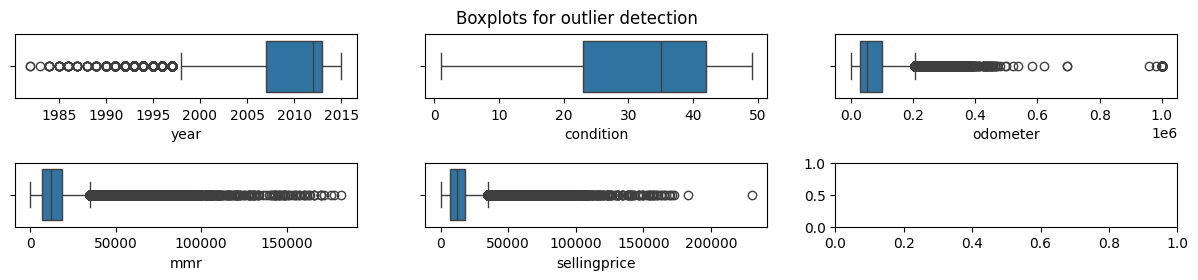

In [368]:
# create 2 row x 3 column figure
fig, axes = plt.subplots(2, 3, figsize=(15, 2.5))
fig.suptitle('Boxplots for outlier detection')

# create boxplots
sns.boxplot(ax=axes[0,0], x=df_clean['year'])
sns.boxplot(ax=axes[0,1], x=df_clean['condition'])
sns.boxplot(ax=axes[0,2], x=df_clean['odometer'])
sns.boxplot(ax=axes[1,0], x=df_clean['mmr'])
sns.boxplot(ax=axes[1,1], x=df_clean['sellingprice'])

# add spacing between the rows
plt.subplots_adjust(hspace=1) 
plt.show();

- Outliers are detected in `(manufacturing) year`,`odometer`,`mmr`,`sellingprice`

**Calculate the number outliers for each variables**

In [369]:
# Separate numerical into different df
num_cols = df_clean.select_dtypes(include=['int64','float64']).columns.tolist()
print('numeric variables:', num_cols)
print('')

# Loop to cycle through numerical columns and create IQR for each column
for col in num_cols:
    print(col) #Print column name
    percentile25 = df_clean[col].quantile(0.25) # Compute the 25th percentile value 
    percentile75 = df_clean[col].quantile(0.75) # Compute the 75th percentile value   
    iqr = percentile75 - percentile25 # Compute the interquartile range
    
    # Define the upper limit and lower limit for non-outlier values in ``
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print('LL:', lower_limit, '|', 'UL:', upper_limit)

    # Identify subset of data containing outliers
    outliers = df_clean[(df_clean[col] > upper_limit) | (df_clean[col] < lower_limit)]

    # Count how many rows in the data contain outliers 
    print('Rows of outliers :', len(outliers))
    print('')

numeric variables: ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

year
LL: 1998.0 | UL: 2022.0
Rows of outliers : 4021

condition
LL: -5.5 | UL: 70.5
Rows of outliers : 0

odometer
LL: -77736.0 | UL: 205216.0
Rows of outliers : 10375

mmr
LL: -9700.0 | UL: 35100.0
Rows of outliers : 16315

sellingprice
LL: -10050.0 | UL: 35150.0
Rows of outliers : 16354



Outliers detected for `year`, `odometer`, `mmr` and `sellingprice`. 
- `MMR` and `Selling Price`: These columns show the most significant outliers, with approximately 16,000 rows exceeding $35,000. These entries might represent unusually high car valuations.
- `Odometer` has around 10,000 rows with readings exceeding 205,000 miles. Such high mileage readings could indicate odometer tampering or errors in data recording.
- The `year` column seems to have outliers for cars manufactured before 1998, with roughly 4,000 entries. It's uncommon to find a large number of very old cars in a used car dataset.

**Let's pause on outliers and investigate the data first. We need a more thorough understanding of the data before we can determine the best course of action for outliers.**

# Data Analysis

### sellingprice

Imports plot.py

In [370]:
# import plotting functions from file
from plots import *

Feature: sellingprice
Right Skew: 1.95
Median: 12100.0


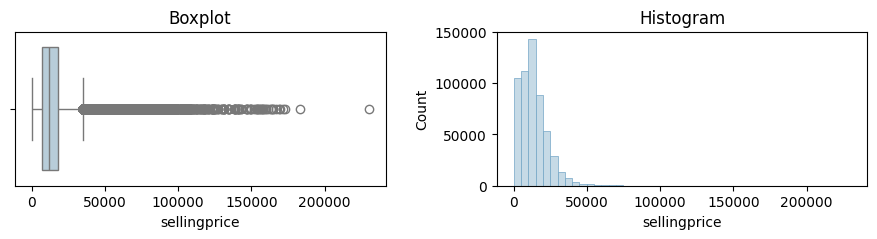

In [371]:
# apply function to plot boxplot and histogram for the feature
bhplt(df_clean,'sellingprice',11,2,0.3,5000)

- The presence of a low average price ($12K) with a number of higher-priced cars suggests a skewed distribution. 
    - This means a larger portion of the data falls towards the lower end (more cars priced under $50,000), while a smaller fraction falls towards the higher end (expensive luxury cars).
- However, there are also some outliers – cars selling for much higher prices, reaching up to $100,000, $150,000, and over $200,000.
    - Several reasons for these expensive outliers could be:
        - The dataset might include luxury car models that naturally have higher price points.
        - Some cars might be priced significantly higher due to exceptionally low mileage or being in pristine condition.
        - There's a possibility that some high prices are due to typos or data entry mistakes.

### mmr

Feature: mmr
Right Skew: 2.0
Median: 12250.0


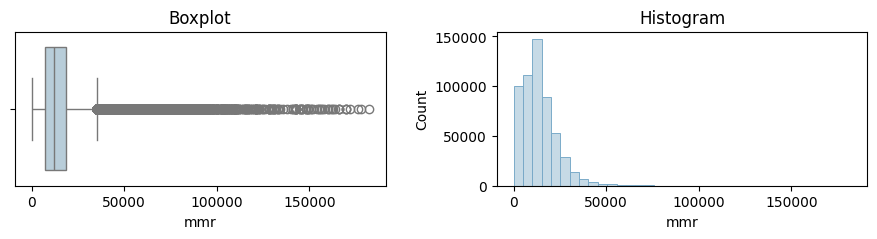

In [372]:
# apply function
bhplt(df_clean,'mmr',11,2,0.3,5000)

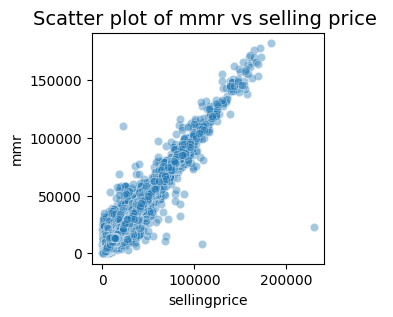

In [373]:
# Create scatterplot
plt.figure(figsize=(3, 3))
sns.scatterplot(data=df_clean, x='sellingprice', y='mmr', alpha=0.4)
plt.title('Scatter plot of mmr vs selling price ', fontsize='14');

- The scattor plot of `mmr` versus `sellingprice` suggests a linear relationship between these two features.
- In simpler terms, as `MMR` increases, `selling price` also tends to increase in a relatively straight-line pattern.
- This finding implies that `MMR` is a strong indicator of `selling price`. In other words, MMR can be a reliable predictor of how much a car will ultimately sell for.

It's important to note that a correlation doesn't necessarily imply causation. There might be other factors influencing selling price besides MMR. However, this initial analysis suggests a strong connection between the two.

### Year (Manufacturing)

Feature: year
Left Skew: -1.18
Median: 2012.0


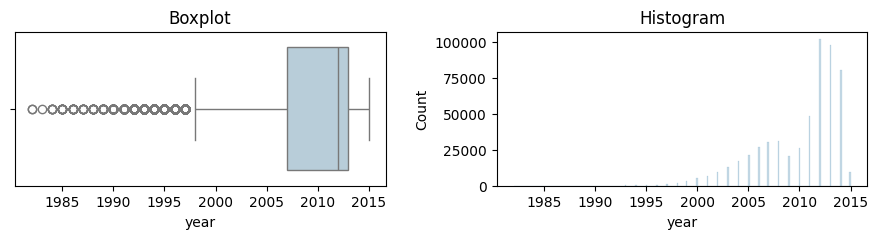

In [374]:
# apply function
bhplt(df_clean,'year',11,2,0.3,None)

- manufacturing year data is skewed to the left with most cars manufactured more recently in 2012. 
- Since the 1990s, car manufacturing consistently increased until 2009 when it dropped for the first time. 
- After a gradual increase and spike in 2012, it dropped in 2013 with a sharp drop in 2015.

Some notable events in these years:
- 2009: The financial crisis significantly impacted car sales, leading to the bankruptcies of General Motors and Chrysler in 2009.
- 2012: This period might reflect a post-bankruptcy recovery. With government aid and restructuring, the automakers may have ramped up production to meet pent-up demand.
- 2013: City of Detroit files for largest municipal bankupcy in history

### Year vs Selling price

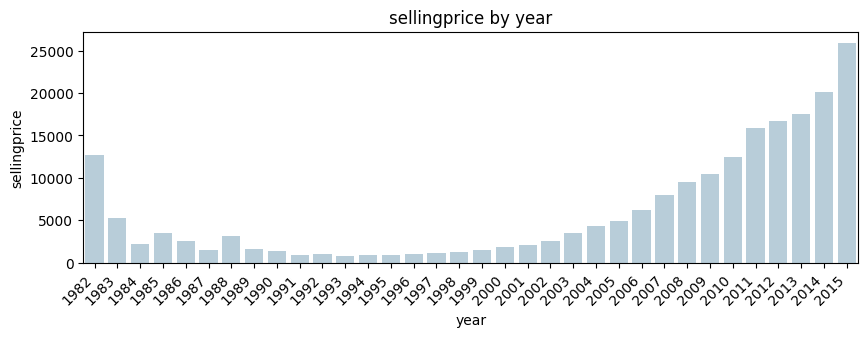

In [375]:
bplts(df_clean,'year','sellingprice',10,3,45,'','')

- Cars manufactured in 2010 and later have higher average selling price while older cars (1990s) has less value. 
- The highest selling price were for cars made in 2015.
- Generally, newer cars tend to cost more than older ones because newer models typically come with advanced features, safety technology, and may have lower mileage.
- However, there can be exceptions, like the 1982. 
    - One possible reason is it is a vintage car 
    - Cars from a specific era, often 25 years or older, can be considered vintage. These cars can be collectible and hold their value, or even appreciate in price, depending on factors like rarity, condition, and historical significance. 

### Condition

Feature: condition
Left Skew: -0.83
Median: 35.0


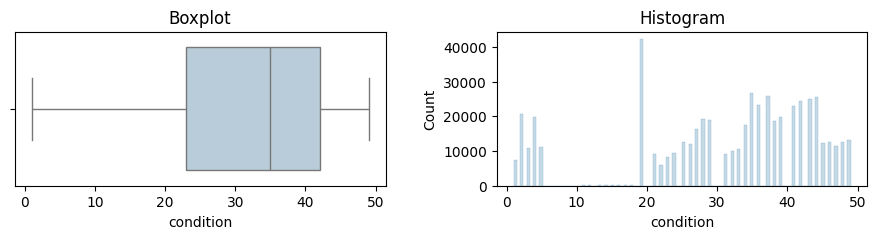

In [376]:
bhplt(df_clean,'condition',11,2,0.3,None)

- The `condition` scores range from 1 (worst) to 49 (best), with a median of 35. 
    - This suggests a large spread of car conditions, but with most cars clustered around an average state.
- A significant number of cars received a score of 18.
    - This could indicate a specific category (e.g., "needs some work") or a tendency for raters to gravitate towards a certain midpoint on the scale.
- Understanding the definitions for each score on the 1-49 scale would clarify the meaning of the median (35) and the spike at 18.
- Knowing how the car conditions were assessed (inspectors, checklists, etc.) could shed light on why scores between 6-10 are missing.

### Condition vs Selling price

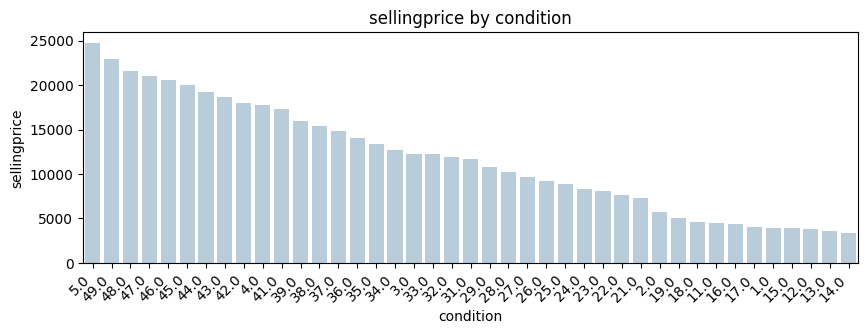

In [377]:
bplts(df_clean,'condition','sellingprice',10,3,45,'desc',None)

- Generally, cars in poorer condition should have lower prices.
- However, the data shows they have surprisingly high average selling prices, with the highest average going to those in the worst condition (score of 5). 
- This suggests there could be other factors influencing price besides just overall condition.

**Let's filter cars with scores under 5 for additional insights**

In [378]:
df_clean.loc[df_clean['condition'] <= 5].sort_values(by='sellingprice',ascending=False).head(20)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
283534,2014,bmw,i8,Base,coupe,automatic,wby2z2c57evx64261,fl,5.0,154.0,white,beige,american bank auto liquidators,170000.0,165000.0,Tue,Feb,10,2015
146917,2014,bmw,i8,Base,coupe,automatic,wby2z2c59evx64214,ca,5.0,60.0,white,brown,ferrari of orange county,176000.0,165000.0,Thu,Jan,15,2015
239357,2014,bmw,i8,Base,coupe,automatic,wby2z2c5xevx64349,fl,5.0,530.0,gray,brown,auto plaza motor sports llc,170000.0,159000.0,Tue,Feb,10,2015
301118,2014,bmw,i8,Base,coupe,automatic,wby2z2c50evx64103,ca,5.0,603.0,white,beige,high bid trading co inc,163000.0,158000.0,Thu,Feb,12,2015
194738,2010,rolls royce,Ghost,Base,sedan,automatic,sca664s56aux48701,ca,4.0,19836.0,NaN,NaN,financial services remarketing (bmw int),146000.0,154000.0,Wed,Jan,28,2015
454114,2014,bentley,Flying Spur,Base,sedan,NaN,scbec9za8ec090326,pa,5.0,2343.0,gray,gray,r hollenshead auto sales inc,166000.0,153250.0,Fri,May,22,2015
12948,2010,rolls royce,Ghost,Base,sedan,automatic,sca664s51aux48718,wi,4.0,8440.0,gray,beige,toyota financial services,157000.0,149800.0,Wed,Dec,17,2014
194367,2011,rolls royce,Ghost,Base,sedan,automatic,sca664s51bux49871,ca,4.0,11841.0,gray,off-white,financial services remarketing (bmw int),160000.0,149000.0,Thu,Feb,26,2015
474024,2015,mercedes,G-Class,G63 AMG,suv,automatic,wdcyc7df2fx235432,fl,5.0,170.0,black,black,the collection,143000.0,141000.0,Thu,May,28,2015
29989,2014,mercedes,S-Class,S63 AMG 4MATIC,sedan,automatic,wddug7jb2ea047012,ca,5.0,147.0,black,beige,goodfellas auto sales llc,121000.0,139000.0,Thu,Dec,18,2014


- The data reveals a fascinating trend: cars with very low condition scores (5 or less) yet have the highest average selling price are from luxury makers (like BMW, Rolls Royce, Bentley) 
- For certain luxury car brands, the prestige and status symbol associated with the marque can outweigh the drawbacks of a poor condition. Buyers might be willing to overlook some cosmetic damage or mechanical issues because they value owning a car from that specific brand.

Analyzing car data by make-tier (luxury vs. non-luxury) might reveal more pricing trends.

### odometer

Feature: odometer
Right Skew: 1.84
Median: 52254.0


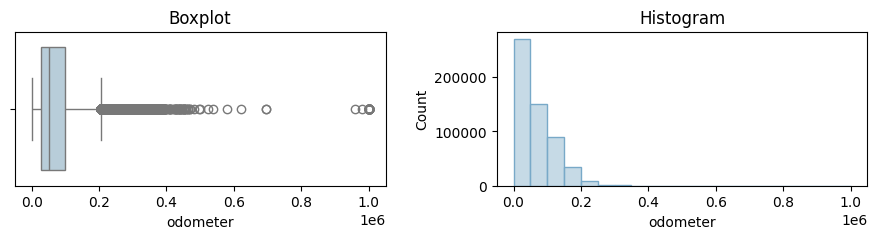

In [379]:
# apply function
bhplt(df_clean,'odometer',11,2,0.3,50000)

- The typical car has around 52,000 miles on the `odometer`, but some real high-mileage outliers go way beyond that - up to nearly a million miles!

We expect cars with lower mileage to generally be worth more. Let's see if the data confirms this.

### `Odometer` vs Selling price

In [380]:
# Group odometer into bins
interval_range = pd.interval_range(start=0, freq=10000, end=200000)
df_clean['odometer_bins'] = pd.cut(df_clean['odometer'], bins=interval_range, labels=[1,2,3])
df_clean[['odometer','odometer_bins']]

,odometer,odometer_bins
0,16639.0,"(10000, 20000]"
1,9393.0,"(0, 10000]"
2,1331.0,"(0, 10000]"
3,14282.0,"(10000, 20000]"
4,2641.0,"(0, 10000]"
...,...,...
529013,5705.0,"(0, 10000]"
529622,18561.0,"(10000, 20000]"
548784,2846.0,"(0, 10000]"
551222,9562.0,"(0, 10000]"


c:\Users\tunhi\OneDrive\Documents\Github\vehiclesales\plots.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order = df.groupby([x])[y].mean().sort_values(ascending=False).head(lim).index


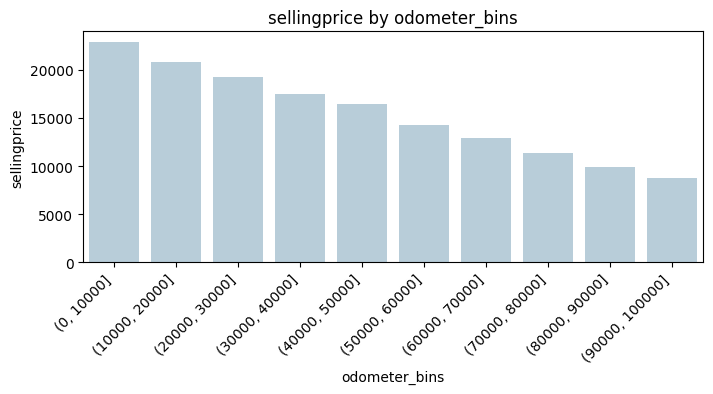

In [381]:
# apply function to plot selling price vs odometer
bplts(df_clean,'odometer_bins','sellingprice',8,3,45,'desc',10)

As expected, the data shows a clear connection between mileage and selling price. Cars fresh off the lot (under 10,000 miles) typically fetch the highest prices, and that price dips with each mile driven.

### make

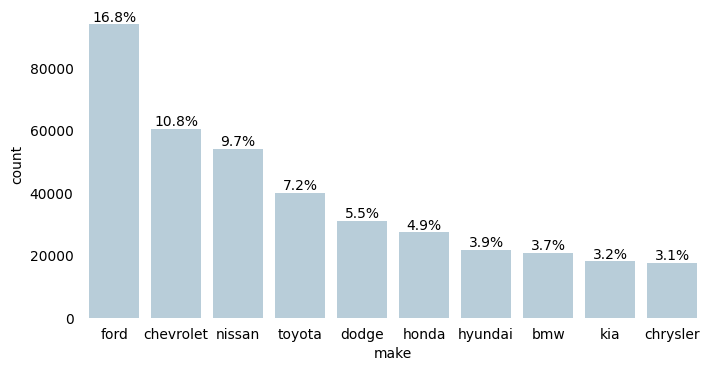

In [382]:
ctplt(df_clean, 'make' ,None, 8, 4, 10, 0,'y','%')

- Ford emerges as the sales leader, capturing a sizeable chunk of the market at 16.8%. 
- Chevrolet and Nissan follow closely behind, holding shares of 10.8% and 9.7% respectively.

### Make vs Selling price

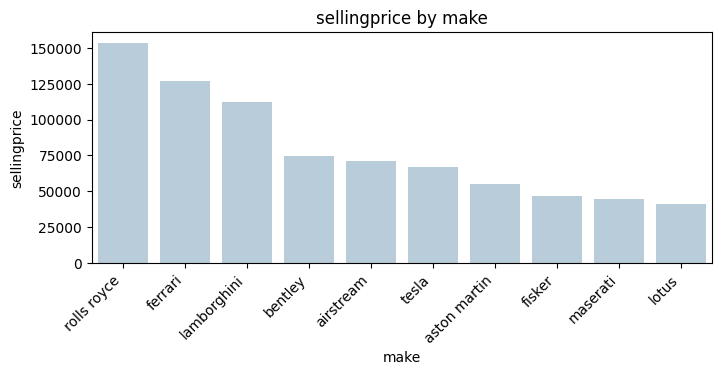

In [383]:
bplts(df_clean,'make','sellingprice',8,3,45,'desc',10)

- Based on average selling price, Rolls Royce leads the pack, followed by Ferrari and Lamborghini.
- Since these are luxury brands, they might not be the best for comparing prices across all car manufacturers.
- Grouping car makes by category (like luxury vs. premium vs. mass market) would provide a more accurate comparison of average selling prices within similar classes.

### model

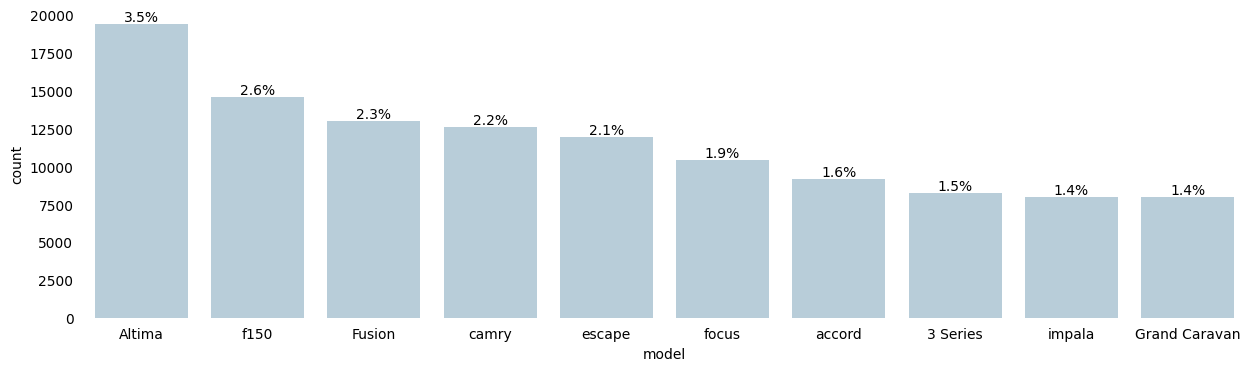

In [384]:
ctplt(df_clean, 'model',None,15,4,10,0,'y','%')

### model vs selling price

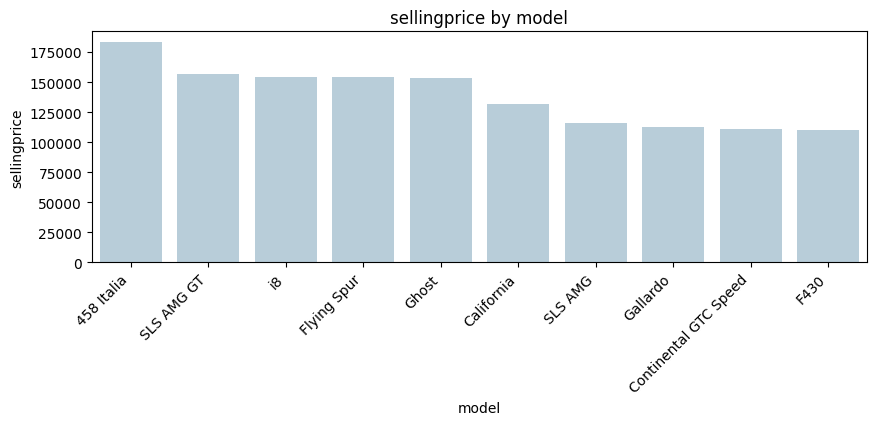

In [385]:
bplts(df_clean,'model','sellingprice',10,3,45,'desc',10)

- The 458 Italia, 360, and 6 series Gran Coupe models take the top spots for average selling price, but that's to be expected since they're high-tier models. 
- To make a fairer comparison, we should categorize the cars by their tier (make_tier) so we're comparing apples to apples.

### `trim`

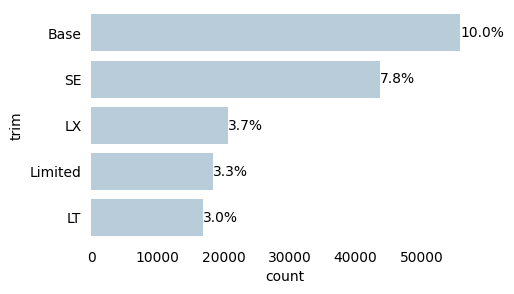

In [386]:
ctplt(df_clean, None, 'trim', 5,3,5,0,'y','%')

- A base trim is most popular in the market taking the top position with 10% of the market share. 

### `body`

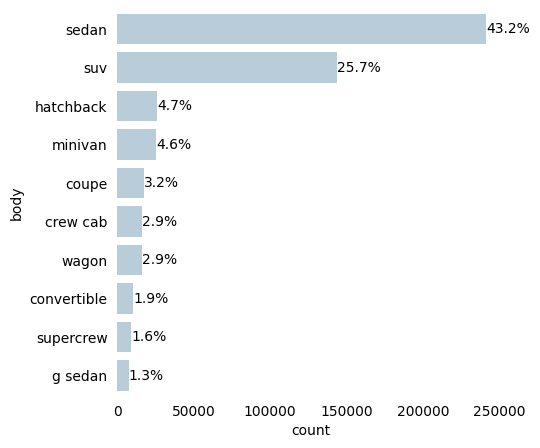

In [387]:
ctplt(df_clean,None,'body',5,5,10,0,'y','%')

- Over 43% of the market is composed of sedan sales
- whereas SUV sales make up a quarter of the market

### transmission

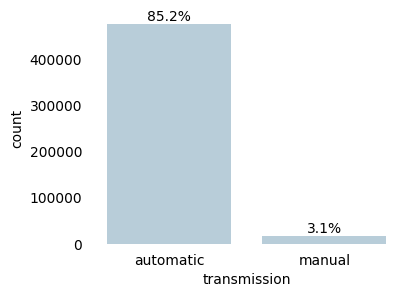

In [388]:
ctplt(df_clean,'transmission',None,4,3,10,0,'y','%')

85% of cars sold had auto transmission, indicting consumers preference for automatic over manual tranmission

### `state`


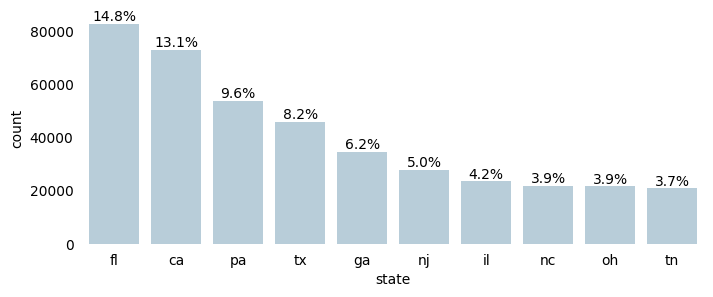

In [389]:
ctplt(df_clean,'state',None,8,3,10,0,'y','%')

### State vs selling price

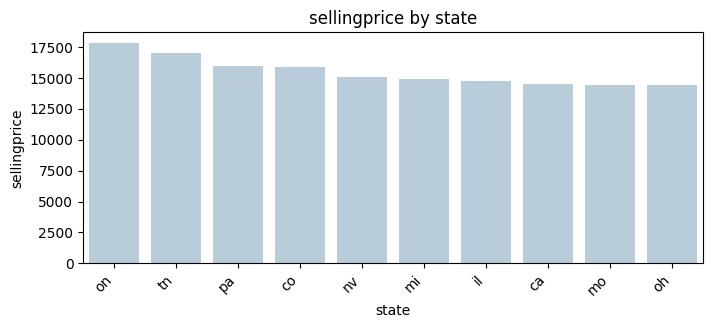

In [390]:
bplts(df_clean,'state','sellingprice',8,3,45,'desc',10)

- Ontario has the highest average selling price followed by tennesee and pennsylvania

- A valuable improvement would be to group the states into regions. This would allow us to identify trends specific to different parts of the country, rather than just looking at state averages.

### color


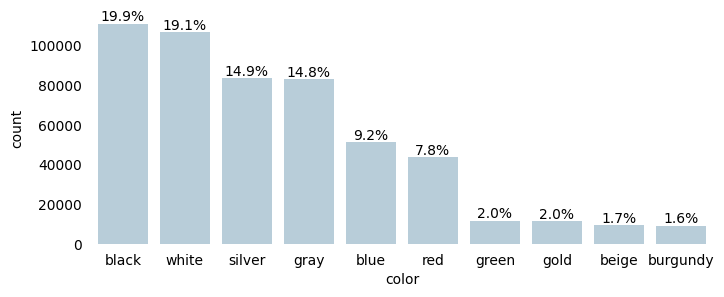

In [391]:
ctplt(df_clean,'color',None,8,3,10,0,'y','%')

- muted colors are more popular in the market with black and white leading at ~`20%`

### interior


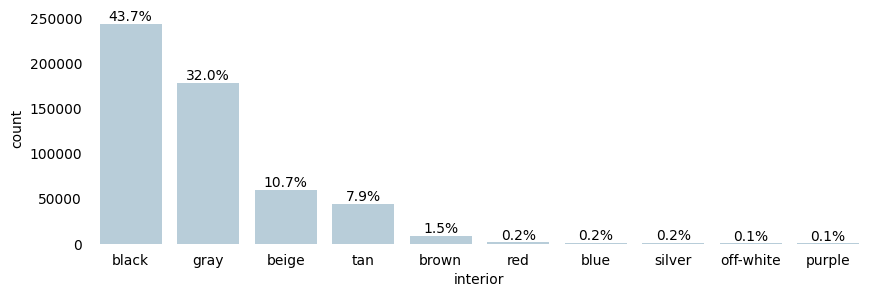

In [392]:
ctplt(df_clean,'interior',None,10,3,10,0,'y','%')

- black and gray are most popular colors for interiors

### seller


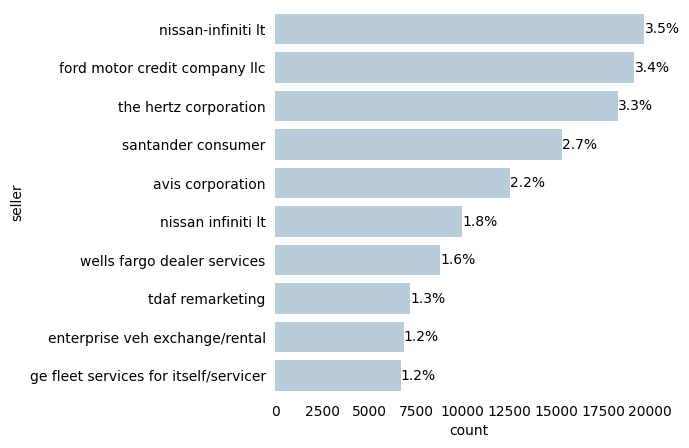

In [393]:
ctplt(df_clean,None,'seller',5,5,10,0,'y','%')

### `sale_weekday`


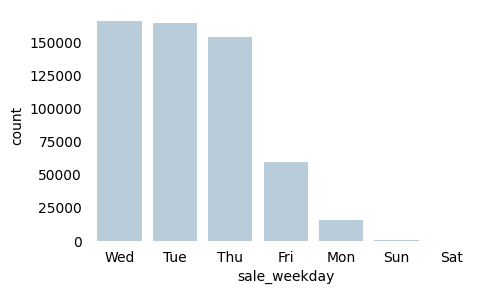

In [394]:
ctplt(df_clean,'sale_weekday',None,5,3,None,0,'','')

- The data shows a clear trend - car dealerships tend to sell the most cars during the workweek (Wednesday, Tuesday, Thursday). 
- Saturdays and Sundays see a drop in sales volume.

### `sale_month`


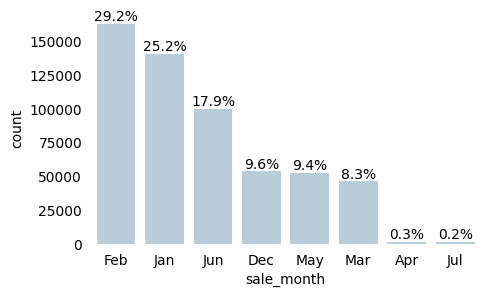

In [395]:
ctplt(df_clean,'sale_month',None,5,3,None,0,'y','%')

- the `month` of February has the most car sales and Jul has the least.

Potential reasons for higher sales in February:
- Car dealerships often run sales promotions and clearance events in February to clear out leftover inventory from the previous year and make room for new models arriving in spring. These deals can incentivize purchases.
- There might be tax breaks or incentives for car purchases at the end of the fiscal year (which can fall in February). 
- Weather: Depending on the location, February might be a time with less desirable weather conditions for using alternative modes of transportation (like bicycles or motorcycles). This could nudge people towards considering car purchases.

Potential reasons for lower sales in July:
- July often falls during peak vacation season. People might be focusing on travel plans, leisure activities, or spending less due to vacations, leading to a postponement of car purchases.
- In July, some consumers might be shifting their focus and budget towards back-to-school expenses, reducing their discretionary spending on cars.

### month vs selling price

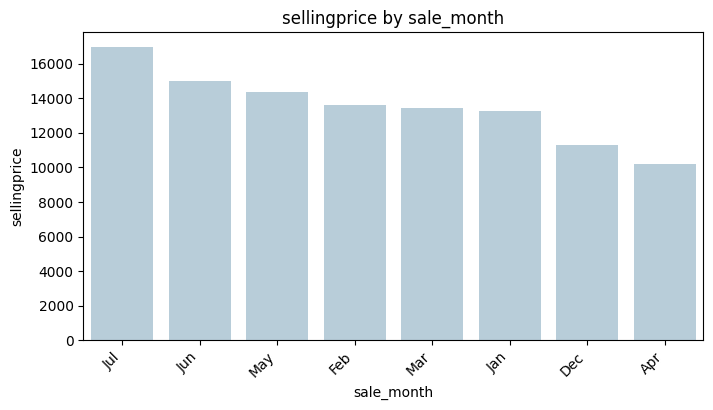

In [396]:
bplts(df_clean,'sale_month','sellingprice',8,4,45,'desc',None)

- Interestingly, July has the highest average selling price for cars, even though it sees the fewest sales. 
- This could suggest that dealerships raise prices in the summer months, possibly to compensate for the lower sales volume they experience during that time.

### `sale_day`

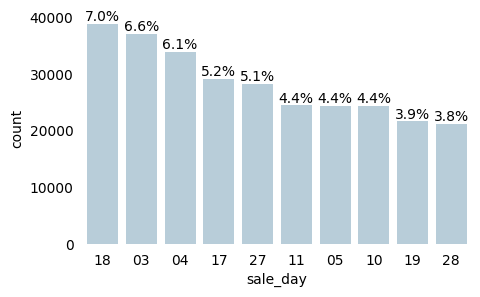

In [400]:
ctplt(df_clean,'sale_day',None,5,3,10,0,'y','%')

- Interestingly, the data shows a spike in sales activity on the 18th of each month, followed by increases on the 3rd, 4th, and 17th. 
- This pattern suggests a potential trend where car dealerships might experience their busiest periods in the *first* and *third* weeks of the month. 
- It would be worthwhile to investigate this further to see if this holds true across a larger dataset.

### day vs selling price

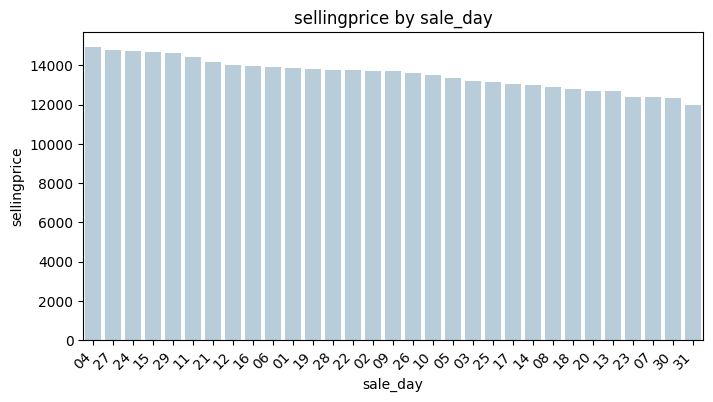

In [401]:
bplts(df_clean,'sale_day','sellingprice',8,4,45,'desc',None)

- While there aren't any significant differences in average selling price when looking at individual days of the month, analyzing the data by week number might reveal more interesting trends. 
- This is because sales patterns might be more consistent across entire weeks rather than just specific days.

### `sale_year`


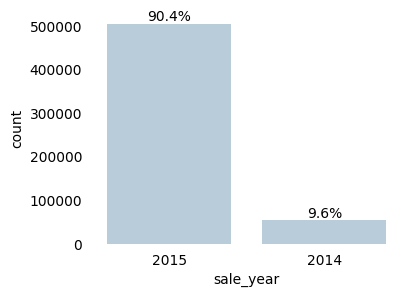

In [402]:
ctplt(df_clean,'sale_year',None,4,3,None,0,'y','%')

Majority of the sales occured in the 2014-2015. 

# Feature Engineering

## Feature Extraction

In [403]:
df_feat = df_clean.copy()

### Make Tier

In [404]:
# create a dictionary of replacements
model_positioning = {'kia':'mass market',
                    'bmw':'premium',
                    'volvo':'premium', 
                    'nissan':'mass market', 
                    'chevrolet':'mass market', 
                    'audi':'premium', 
                    'ford':'mass market',
                    'hyundai':'mass market', 
                    'buick':'semi-premium', 
                    'cadillac':'premium', 
                    'acura':'premium', 
                    'lexus':'premium', 
                    'infiniti': 'premium',
                    'jeep': 'semi-premium', 
                    'mercedes': 'premium', 
                    'mitsubishi': 'mass market', 
                    'mazda': 'mass market', 
                    'mini': 'semi-premium', 
                    'land rover': 'premium',
                    'lincoln': 'premium', 
                    'jaguar': 'premium', 
                    'volkswagen': 'semi-premium', 
                    'toyota': 'mass market', 
                    'subaru': 'semi-premium', 
                    'scion': 'mass market',       
                    'porsche': 'luxury',  
                    'dodge': 'mass market', 
                    'fiat': 'mass market', 
                    'chrysler': 'mass market', 
                    'ferrari': 'top of line', 
                    'honda': 'mass market', 
                    'gmc': 'mass market', 
                    'ram': 'mass market', 
                    'smart': 'semi-premium', 
                    'bentley': 'top of line', 
                    'pontiac': 'mass market', 
                    'saturn': 'mass market', 
                    'maserati': 'luxury',
                    'mercury': 'mass market', 
                    'hummer': 'mass market', 
                    'saab': 'other', 
                    'suzuki': 'mass market', 
                    'oldsmobile': 'other', 
                    'isuzu': 'other',              
                    'geo': 'other', 
                    'rolls royce': 'top of line', 
                    'daewoo': 'other', 
                    'plymouth': 'mass market', 
                    'tesla': 'semi-premium', 
                    'airstream': 'mass market',
                    'aston martin': 'top of line', 
                    'fisker': 'other', 
                    'lamborghini': 'top of line', 
                    'lotus':'semi-premium'
                     }

# replace values using the .map() method
df_feat['make_tier'] = df_feat['make'].map(model_positioning).fillna(df_feat['make'])

# print the DataFrame
df_feat[['make','make_tier']].head()

,make,make_tier
0,kia,mass market
1,kia,mass market
2,bmw,premium
3,volvo,premium
4,bmw,premium


#### Make Tier vs Selling price

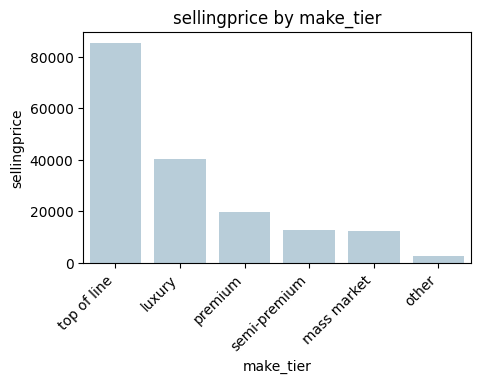

In [405]:
bplts(df_feat,'make_tier','sellingprice',5,3,45,'desc',None)

Quick Statistics

In [406]:
df_feat.groupby('make_tier')[['sellingprice']].agg({'sellingprice': ['count','min','mean','max','sum']})

sellingprice                                               
                    count      min          mean       max           sum
make_tier                                                               
luxury               1538   1200.0  40294.278934  157000.0  6.197260e+07
mass market        406114      1.0  12293.013036  230000.0  4.992365e+09
other                1103      1.0   2624.502267   54500.0  2.894826e+06
premium             97608      1.0  19617.908450  173000.0  1.914865e+09
semi-premium        41980    100.0  12539.511029   85750.0  5.264087e+08
top of line           181  22700.0  85490.331492  183000.0  1.547375e+07

**Separate the dataframe into different tiers to generate statistics.**

In [407]:
# calculate mean diference between top of line and mass market cars
top_mean = 85490.331492	
mass_mean = 12293.013036
mean_diff = top_mean/mass_mean

# calculate sum difference between top of line and mass market cars
mass_sum = 4.992365e+09
top_sum = 1.547375e+07
sum_diff = mass_sum/top_sum

# total sales from all tiers
total_sum = 6.197260e+07+4.992365e+09+2.894826e+06+1.914865e+09+5.264087e+08+1.547375e+07

#average market sales from `mass market cars`
avg_mass_sum = (mass_sum/total_sum)*100 


print('Top of the Line vs Mass market sales')
print(f'Mean Diff ():                                  {mean_diff:.2f}')
print(f'Sum Diff:                                   {sum_diff:.2f}')
print('')
print(f'Average market sales from mass market cars: {avg_mass_sum:.1f}%')

Top of the Line vs Mass market sales
Mean Diff ():                                  6.95
Sum Diff:                                   322.63

Average market sales from mass market cars: 66.4%


- On average, the selling price of top of the line cars is 6.95x more than mass market cars
- however, there are signifcant more mass market cars than top of the line cars; therefore the overall sales generated from mass market cars is more than 320x that of top of the line cars
- In short, sales of mass market cars dominates 66.4% of the market

### Region

In [408]:
df_feat['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns', nan], dtype=object)

In [409]:
# create a dictionary of replacements
region_positioning = {'ca':'w',
                    'tx': 'sw', 
                    'pa': 'ne', 
                    'mn': 'mw', 
                    'az': 'sw', 
                    'wi': 'mw' , 
                    'tn': 'se' , 
                    'md': 'ne', 
                    'fl': 'se' , 
                    'ne': 'mw', 
                    'nj': 'ne',
                    'nv': 'w', 
                    'oh': 'mw' , 
                    'mi': 'mw' , 
                    'ga': 'se' , 
                    'va':'se'  , 
                    'sc': 'se' , 
                    'nc': 'se' , 
                    'in': 'mw' , 
                    'il': 'mw' , 
                    'co': 'w', 
                    'ut': 'w',
                    'mo':'mw'  , 
                    'ny': 'ne', 
                    'ma': 'ne', 
                    'pr': 'se' , 
                    'or': 'w', 
                    'la': 'se' , 
                    'wa': 'w', 
                    'hi': 'w', 
                    'qc': 'ne', 
                    'ab': 'w', 
                    'on': 'ne',
                    'ok': 'sw', 
                    'ms': 'ne', 
                    'nm': 'sw', 
                    'al': 'se', 
                    'ns': 'ne'
                    }

# replace values using the .map() method
df_feat['regions'] = df_feat['state'].map(region_positioning).fillna(df_feat['state'])

# print the DataFrame
df_feat[['state','regions']]

,state,regions
0,ca,w
1,ca,w
2,ca,w
3,ca,w
4,ca,w
...,...,...
529013,NaN,NaN
529622,NaN,NaN
548784,NaN,NaN
551222,NaN,NaN


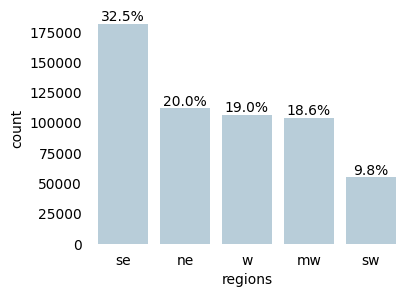

In [410]:
ctplt(df_feat,'regions',None,4,3,None,0,'y','%')

- The Southeast region leads the pack, accounting for roughly 33% of all sales.
- Following closely behind is the Northeast, West, and Midwest region, capturing around 20%, 19%, and 18.6% of the total sales, respectively. 
- The Southwest region brings up the rear with the lowest sales percentage, sitting at approximately 9.8%.

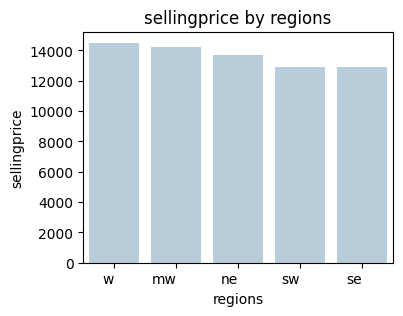

In [411]:
bplts(df_feat,'regions','sellingprice',4,3,0,'desc',None)

- Interestingly, car prices seem fairly consistent across most regions in the US. 
- The average selling price in the West, the highest priced region, is only around $14,500.
- This is just slightly higher than the average price range of $12,000 to $14,000 observed in other regions.
- This data suggests that car prices don't vary dramatically across different parts of the country, with the West having a slight edge but overall price consistency being the bigger takeaway.

### Car Age

In [412]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558837 entries, 0 to 554710
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   year           558837 non-null  int64   
 1   make           548536 non-null  object  
 2   model          548536 non-null  object  
 3   trim           548186 non-null  object  
 4   body           545642 non-null  object  
 5   transmission   493481 non-null  object  
 6   vin            558837 non-null  object  
 7   state          558811 non-null  object  
 8   condition      547043 non-null  float64 
 9   odometer       558743 non-null  float64 
 10  color          533402 non-null  object  
 11  interior       541012 non-null  object  
 12  seller         558811 non-null  object  
 13  mmr            558825 non-null  float64 
 14  sellingprice   558825 non-null  float64 
 15  sale_weekday   558799 non-null  object  
 16  sale_month     558799 non-null  object  
 17  sale_day       

Before calculating the car age, convert the datatype for sale_year to int first.
- But there seems to be null values preventing the conversion

**Check unique values of sale_year**

In [413]:
df_feat['sale_year'].value_counts(dropna=False)

sale_year
2015    505072
2014     53727
None        26
NaN         12
Name: count, dtype: int64

- there is 38 null values 

In [414]:
# filter mask_trim to get a count of all rows 
df_feat.loc[(df_feat['sale_year'].isnull())].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year,odometer_bins,make_tier,regions
306447,2013,hyundai,Sonata,GLS,sedan,automatic,5npeb4ac6dh687932,il,19.0,37254.0,gray,gray,kfl llc,NaN,NaN,NaN,NaN,NaN,NaN,"(30000, 40000]",mass market,mw
406524,2013,chrysler,300,Base,sedan,automatic,2c3ccaag9dh723146,il,27.0,44208.0,silver,black,kfl llc,NaN,NaN,NaN,NaN,NaN,NaN,"(40000, 50000]",mass market,mw
422358,2013,hyundai,Sonata,GLS,sedan,NaN,5npeb4ac3dh735368,az,28.0,44299.0,blue,gray,kfl llc,NaN,NaN,NaN,NaN,NaN,NaN,"(40000, 50000]",mass market,sw
429644,2013,chrysler,200,Touring,sedan,automatic,1c3ccbbb9dn718531,il,25.0,47344.0,white,black,kfl llc,NaN,NaN,NaN,NaN,NaN,NaN,"(40000, 50000]",mass market,mw
429660,2013,dodge,avenger,SXT,sedan,automatic,1c3cdzcg5dn741076,il,34.0,44525.0,gray,black,kfl llc,NaN,NaN,NaN,NaN,NaN,NaN,"(40000, 50000]",mass market,mw


- The data shows 38 cars from 2013-2015 (mostly 2015) have missing sales years. 
- Since these cars have non-zero odometer readings, they were likely used vehicles. 
- Given they must have been sold after their manufacturing year and the dataset ends in 2015, we can safely impute the missing sales year as 2015.

Imput null values in sale_year with current year '2015

In [415]:
df_feat['sale_year'] = df_feat['sale_year'].fillna(value='2015')

Validate there is no more null values

In [416]:
df_feat['sale_year'].value_counts(dropna=False)

sale_year
2015    505110
2014     53727
Name: count, dtype: int64

In [417]:
### Convert Column to Integer
df_feat['sale_year'] = df_feat['sale_year'].astype(int)

In [418]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558837 entries, 0 to 554710
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   year           558837 non-null  int64   
 1   make           548536 non-null  object  
 2   model          548536 non-null  object  
 3   trim           548186 non-null  object  
 4   body           545642 non-null  object  
 5   transmission   493481 non-null  object  
 6   vin            558837 non-null  object  
 7   state          558811 non-null  object  
 8   condition      547043 non-null  float64 
 9   odometer       558743 non-null  float64 
 10  color          533402 non-null  object  
 11  interior       541012 non-null  object  
 12  seller         558811 non-null  object  
 13  mmr            558825 non-null  float64 
 14  sellingprice   558825 non-null  float64 
 15  sale_weekday   558799 non-null  object  
 16  sale_month     558799 non-null  object  
 17  sale_day       

**Calculate car age and year of sale**

In [419]:
df_feat['age'] = df_feat['sale_year'] - df_feat['year']

In [420]:
df_feat[['sale_year','year','age']].head()

,sale_year,year,age
0,2014,2015,-1
1,2014,2015,-1
2,2015,2014,1
3,2015,2015,0
4,2014,2014,0


**Drop year redundant year features**

In [421]:
df_feat = df_feat.drop(['sale_year','year'], axis=1)

In [422]:
df_feat.head()

,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,odometer_bins,make_tier,regions,age
0,kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,16,"(10000, 20000]",mass market,w,-1
1,kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,16,"(0, 10000]",mass market,w,-1
2,bmw,3 Series,328i SULEV,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,Jan,15,"(0, 10000]",premium,w,1
3,volvo,S60,T5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,Jan,29,"(10000, 20000]",premium,w,0
4,bmw,6 Series Gran Coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,Dec,18,"(0, 10000]",premium,w,0


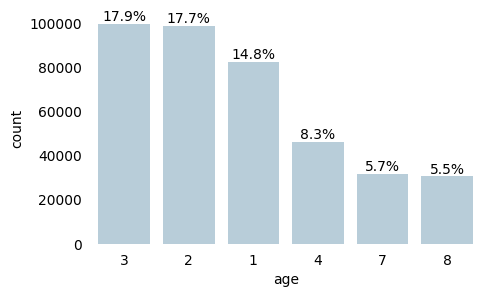

In [423]:
ctplt(df_feat,'age',None,5,3,6,0,'y','%')

A whopping half of the market share is currently occupied by vehicles three years old or newer. This suggests a strong preference for younger models among car buyers.

# Data Cleaning cont.

With a better understanding of the data, let's start the handling missing data. 

## Handle Missing Values

In [424]:
# Get a count of  missing values in dataframe
sum_missing = df_feat.isna().sum().sum()
print('Total count of missing values:', sum_missing)

percent_missing = 100*(df_feat.isna().sum().sum())/df_feat.size
print(f'Total % of missing values: {percent_missing:.2f}%')

# Display missing values per column in dataframe
print('Missing values per column:')
df_feat.isna().sum().sort_values(ascending=False)

Total count of missing values: 187674
Total % of missing values: 1.60%
Missing values per column:


transmission     65356
color            25435
interior         17825
body             13195
odometer_bins    12205
condition        11794
trim             10651
make_tier        10301
model            10301
make             10301
odometer            94
sale_weekday        38
sale_month          38
sale_day            38
seller              26
state               26
regions             26
mmr                 12
sellingprice        12
vin                  0
age                  0
dtype: int64

In [425]:
# make a copy of the dataframe and assign new name
# df_clean2 where null values are addressed
df_clean2 = df_feat.copy()

### make/model/trim

there are 10301 rows where all three features are missing. Unless we do 10K search for these based on the vin, the best option would be to drop these rows.

In [426]:
# Drop one specific column
df_clean2 = df_clean2.dropna(subset=["make"])

# Display missing values per column in dataframe
print('Missing values per column:')
df_clean2.isna().sum().sort_values(ascending=False)

Missing values per column:


transmission     63595
color            25222
interior         17428
condition        11707
odometer_bins    11451
body              2894
trim               350
odometer            90
sale_weekday        38
sale_month          38
sale_day            38
state               26
regions             26
seller              26
mmr                 12
sellingprice        12
make_tier            0
make                 0
model                0
vin                  0
age                  0
dtype: int64

### transmission/color/interior
Imput mode for the these categorical variables

In [427]:
#Impute Missing Values by changing null to mode 
df_clean2['transmission'] = df_clean2['transmission'].fillna(df_clean2['transmission'].mode()[0])
df_clean2['color'] = df_clean2['color'].fillna(df_clean2['color'].mode()[0])
df_clean2['interior'] = df_clean2['interior'].fillna(df_clean2['interior'].mode()[0])

In [428]:
# Display missing values per column in dataframe
print('Missing values per column:')
df_clean2.isna().sum().sort_values(ascending=False)

Missing values per column:


condition        11707
odometer_bins    11451
body              2894
trim               350
odometer            90
sale_month          38
sale_day            38
sale_weekday        38
regions             26
state               26
seller              26
mmr                 12
sellingprice        12
make                 0
make_tier            0
interior             0
model                0
color                0
vin                  0
transmission         0
age                  0
dtype: int64

### odometer_bins/state 

Drop these columns
- odometer_bins: because it was created for visual purposes
- state: as it's replaced by region

In [429]:
# Drop specific columns
df_clean2 = df_clean2.drop(['odometer_bins','state'],axis=1)

In [430]:
# Display missing values per column in dataframe
print('Missing values per column:')
df_clean2.isna().sum().sort_values(ascending=False)

Missing values per column:


condition       11707
body             2894
trim              350
odometer           90
sale_weekday       38
sale_day           38
sale_month         38
regions            26
seller             26
mmr                12
sellingprice       12
make                0
make_tier           0
interior            0
model               0
color               0
vin                 0
transmission        0
age                 0
dtype: int64

### condition 

since condition data is skewed, lets' impute null values with the median

In [431]:
#Impute Missing Values by changing null to median 
df_clean2['condition'] = df_clean2['condition'].replace(np.nan,df_clean2['condition'].median())

In [432]:
# Display missing values per column in dataframe
print('Missing values per column:')
df_clean2.isna().sum().sort_values(ascending=False)

Missing values per column:


body            2894
trim             350
odometer          90
sale_day          38
sale_month        38
sale_weekday      38
regions           26
seller            26
sellingprice      12
mmr               12
make               0
make_tier          0
interior           0
model              0
color              0
condition          0
vin                0
transmission       0
age                0
dtype: int64

### body

Missing body styles can be filled with values from cars of the same make and model where the body information is available

In [433]:
# create a mask to see how many rows have no body data 
mask_body = df_clean2.loc[df_clean2['body'].isnull()]
mask_body.shape

(2894, 19)

In [434]:
# check how many models have nan for body.
mask_body['model'].value_counts().head(15)

model
pacifica      148
rangerover    113
galant        100
gx             98
hhr            92
grand          86
pilot          82
srx            76
explorer       74
corvette       62
f150           62
wrangler       61
forester       58
expedition     57
1500           54
Name: count, dtype: int64

Let's look at rows where the model = pacifica 

In [435]:
df_clean2.loc[df_clean2['model'] == 'pacifica'].value_counts(dropna=False)

make      model     trim            body   transmission  vin                condition  odometer  color   interior  seller                       mmr     sellingprice  sale_weekday  sale_month  sale_day  make_tier    regions  age
chrysler  pacifica  Base            wagon  automatic     2a8gf48x17r280641  35.0       67991.0   silver  gray      abs                          3975.0  3500.0        Thu           Dec         18        mass market  ne       7      1
                    awd             NaN    automatic     2c8gf684x4r343514  19.0       160495.0  green   gray      autonation honda clearwater  2225.0  1300.0        Tue           Jan         06        mass market  se       11     1
                    awd v6 limited  NaN    automatic     2a8gf78436r605120  26.0       94706.0   blue    gray      santander consumer           4850.0  6200.0        Thu           Jan         08        mass market  mw       9      1
                                                         2a8gf78406r63878

By finding a common body style (e.g., 'wagon') for a specific car model (e.g., Chrysler Pacifica) and it can be used to fill missing body styles for other cars of the same model.

Let's create function for this.

In [436]:
def get_body_mode_by_model(df):
  """
  This function iterates through unique car models in a DataFrame 'df' 
  and calculates the mode of the 'body' column for each model.

  Returns:
      A dictionary where keys are unique car models and values are the corresponding body mode.
  """
  # Create a dictionary to store model-body mode pairs
  model_body_mode = {}

  # Get unique car models
  unique_models = df['model'].unique()

 # Loop through each unique car model
  for model in unique_models:
    # Filter rows for the current model
    model_data = df[df['model'] == model]

    # Get the mode of the 'body' column for this model (handling potential NaNs)
    body_mode = model_data['body'].mode(dropna=False)

    # Check if the mode is not NaN and save it
    if not pd.isna(body_mode.iloc[0]):
      model_body_mode[model] = body_mode.iloc[0]

  return model_body_mode


In [437]:
get_body_mode_by_model(df_clean2)


{'Sorento': 'suv',
 '3 Series': 'sedan',
 'S60': 'sedan',
 '6 Series Gran Coupe': 'sedan',
 'Altima': 'sedan',
 'M5': 'sedan',
 'cruze': 'sedan',
 'a4': 'sedan',
 'camaro': 'coupe',
 'a6': 'sedan',
 'optima': 'sedan',
 'Fusion': 'sedan',
 'Sonata': 'sedan',
 'Q5': 'suv',
 '6 Series': 'convertible',
 'impala': 'sedan',
 '5 Series': 'sedan',
 'A3': 'wagon',
 'XC70': 'wagon',
 'X5': 'suv',
 'SQ5': 'suv',
 'S5': 'coupe',
 'Verano': 'sedan',
 'suburban': 'suv',
 'ELR': 'coupe',
 'V60': 'wagon',
 'X6': 'suv',
 'ILX': 'sedan',
 'K900': 'sedan',
 'malibu': 'sedan',
 'RX 350': 'suv',
 'versa': 'sedan',
 'elantra': 'sedan',
 'Versa Note': 'hatchback',
 'A8': 'sedan',
 'X1': 'suv',
 '7 Series': 'sedan',
 'Enclave': 'suv',
 'TTS': 'coupe',
 '4 Series': 'coupe',
 'Silverado 2500HD': 'crew cab',
 'MDX': 'suv',
 'Silverado 1500': 'crew cab',
 'srx': 'suv',
 'G Coupe': 'g coupe',
 'G Sedan': 'g sedan',
 'FX': 'suv',
 'santa': 'suv',
 'Genesis': 'sedan',
 'Equus': 'sedan',
 'Sonata Hybrid': 'sedan',
 '

In [438]:
def impute_body_by_model(df):
  """
  This function imputes missing values (NaN) in the 'body' column of a DataFrame 'df'
  based on the mode of the 'body' values for each unique value in the 'model' column.

  Returns:
      A new Pandas DataFrame with imputed values in the 'body' column.
  """
  # Get unique car models and calculate body mode for each model (store in dictionary)
  model_body_mode = get_body_mode_by_model(df)

  # Impute missing values in 'body' with the corresponding body_mode
  df['body'] = df['body'].fillna(df['model'].map(model_body_mode))

In [439]:
impute_body_by_model(df_clean2)

Validate changes made

In [440]:
# create a mask to see how many rows have no data 
mask_body = df_clean2.loc[df_clean2['body'].isnull()]
mask_body.shape

(931, 19)

The number of rows with null body values have been reduced from 2894 to 931.

In [441]:
# check how many models have nan for body.
mask_body['model'].value_counts()

model
gx         98
hhr        92
grand      86
350z       52
gr         51
           ..
carrera     1
sl55        1
pt          1
320i        1
b2300       1
Name: count, Length: 66, dtype: int64

These model still show null body values, let's look at one 

In [442]:
df_clean2.loc[df_clean2['model'] == 'gr'].value_counts(dropna=False)

make   model  trim                  body  transmission  vin                condition  odometer  color     interior  seller                                    mmr      sellingprice  sale_weekday  sale_month  sale_day  make_tier     regions  age
dodge  gr     caravan crew          NaN   automatic     2c4rdgdg0er145354  47.0       20337.0   white     black     chrysler canada inc                       20600.0  25000.0       Tue           Jan         13        mass market   ne       1      1
jeep   gr     cher 4x4 v8 limited   NaN   automatic     1j4gz78y9wc194505  19.0       188875.0  white     tan       autonation chevrolet delray               775.0    400.0         Tue           Jan         06        semi-premium  se       17     1
dodge  gr     caravan crew          NaN   automatic     2c4rdgdgxer240388  45.0       29350.0   black     black     chrysler canada inc                       20000.0  19800.0       Tue           Jan         13        mass market   ne       1      1
         

there are no rows where cars with similar make and model have a body value, hence, these remained as null values even after imputation. 

Besides googling each model one by one, this is the best we can do to fill in missing body values.


In [443]:
# Get a count of  missing values in dataframe
sum_missing = df_clean2.isna().sum().sum()
print('Total count of missing values:', sum_missing)

percent_missing = 100*(df_clean2.isna().sum().sum())/df_clean2.size
print(f'Total % of missing values: {percent_missing:.2f}%')

# Display missing values per column in dataframe
print('Missing values per column:')
df_clean2.isna().sum().sort_values(ascending=False)

Total count of missing values: 1561
Total % of missing values: 0.01%
Missing values per column:


body            931
trim            350
odometer         90
sale_day         38
sale_month       38
sale_weekday     38
regions          26
seller           26
sellingprice     12
mmr              12
make              0
make_tier         0
interior          0
model             0
color             0
condition         0
vin               0
transmission      0
age               0
dtype: int64

since these are very small percentage of the dataset, we can safely drop these rows. 

In [444]:
df_clean3 = df_clean2.dropna(axis=0)

Validate changes

In [445]:
# Get a count of  missing values in dataframe
sum_missing = df_clean3.isna().sum().sum()
print('Total count of missing values:', sum_missing)

Total count of missing values: 0


In [446]:
# Print the percentage of values removed by dropping rows.
row_percent = (df.size - df_clean3.size) / df.size
print(f'Percentage removed, rows: {row_percent:.2f}%')

Percentage removed, rows: 0.19%


**Now the data is cleaned and ready for modeling!**